In [212]:
import muon as mu
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import scanpy as sc
import distinctipy
from distinctipy import colorblind
from distinctipy import examples

In [194]:
import sci_palettes

In [190]:
sc.settings.figdir="../result/1.1_fig6/"

In [43]:
coor_matrix=pd.read_csv("../process_data/trajMap/pearsonAll.csv",index_col=0)
maxAllDf=pd.read_csv("../process_data/trajMap/maxAllDf.csv",index_col=0)
sumAllDf=pd.read_csv("../process_data/trajMap/sumAllDf.csv",index_col=0)

In [44]:
coor_matrixInjury=pd.read_csv("../process_data/trajMap/pearsonAll_injury.csv",index_col=0)
maxAllDfInjury=pd.read_csv("../process_data/trajMap/maxAllDf_injury.csv",index_col=0)
sumAllDfInjury=pd.read_csv("../process_data/trajMap/sumAllDf_injury.csv",index_col=0)

In [105]:
maxAllDfInjury

SkeletalMuscle_Julien_d3Poly_sep_Mesenchyme   
0610005C13Rik                                            2  \
0610007N19Rik                                            0   
0610007P14Rik                                            0   
0610009B22Rik                                            1   
0610009D07Rik                                            0   
...                                                    ...   
Qki                                                      0   
Gm31160                                                  0   
Tesl2                                                    0   
Nlgn4l                                                   0   
Ahsp                                                     0   

               SkeletalMuscle_Julien_d5_sep_Mesenchyme   
0610005C13Rik                                        2  \
0610007N19Rik                                        0   
0610007P14Rik                                        0   
0610009B22Rik                                        1   
0610009D07Rik                                        0   
...                                                ...   
Qki                                                  0   
Gm31160                                              0   
Tesl2                                                0   
Nlgn4l                                               0   
Ahsp                                                 0   

               RibRegeneraton_Serowoky_KO_sep_Mesenchyme   
0610005C13Rik                                          0  \
0610007N19Rik                                          0   
0610007P14Rik                                          0   
0610009B22Rik                                          1   
0610009D07Rik                                          0   
...                                                  ...   
Qki                                                    0   
Gm31160                                                0   
Tesl2                                                  0   
Nlgn4l                                                 0   
Ahsp                                                   0   

               SkeletalMuscle_Julien_d3_sep_Mesenchyme   
0610005C13Rik                                        2  \
0610007N19Rik                                        0   
0610007P14Rik                                        0   
0610009B22Rik                                        1   
0610009D07Rik                                        0   
...                                                ...   
Qki                                                  0   
Gm31160                                              0   
Tesl2                                                0   
Nlgn4l                                               0   
Ahsp                                                 0   

               MsxCranio_Zhang_W2N1_sep_Mesenchyme   
0610005C13Rik                                    0  \
0610007N19Rik                                    0   
0610007P14Rik                                    0   
0610009B22Rik                                    2   
0610009D07Rik                                    0   
...                                            ...   
Qki                                              0   
Gm31160                                          0   
Tesl2                                            0   
Nlgn4l                                           0   
Ahsp                                             0   

               LimbImplant_VesPrey_Acta2_sep_Mesenchyme   
0610005C13Rik                                         4  \
0610007N19Rik                                         0   
0610007P14Rik                                         0   
0610009B22Rik                                         3   
0610009D07Rik                                         0   
...                                                 ...   
Qki                                                   0   
Gm31160                           

In [45]:
diffcol=  set(coor_matrix.columns) - set(coor_matrixInjury.columns).intersection(set(coor_matrix.columns))

In [46]:
diffcol=list(diffcol)

In [47]:
coorConcat=pd.concat([coor_matrix[diffcol],coor_matrixInjury],axis=1)
maxConcat=pd.concat([maxAllDf[diffcol],maxAllDfInjury],axis=1)
sumConcat=pd.concat([sumAllDf[diffcol],sumAllDfInjury],axis=1)

In [48]:
coor_matrix_bk=pd.read_csv("../process_data/trajMap/pearsonAll.csv",index_col=0)

In [128]:
travMatrix=pd.read_csv("../process_data/trajMap/1.11_validation_df_2nd.csv",index_col=0)

In [154]:
travMatrix2

chondro_sep_Ablation_Matsushita_abl14  chondro_sep_Bmsc2019_Regev_b1   
RAV_1                                 0.104919                       0.035723  \
RAV_2                                 0.132893                       0.096972   
RAV_3                                 0.111002                       0.083871   
RAV_4                                 0.078161                       0.144728   
RAV_5                                 0.077162                       0.023584   
...                                        ...                            ...   
RAV_541                               0.302912                       0.054632   
RAV_542                               0.106788                       0.051860   
RAV_543                               0.990572                       0.089439   
RAV_544                               0.770533                       0.078108   
RAV_545                               0.802382                       0.081871   

         chondro_sep_Bmsc2019_Regev_b3  chondro_sep_BmscChondro_Long   
RAV_1                         0.191137                      0.688684  \
RAV_2                         0.208174                      0.764437   
RAV_3                         0.101193                      0.156400   
RAV_4                         0.066388                      0.070952   
RAV_5                         0.065410                      0.092429   
...                                ...                           ...   
RAV_541                       0.056340                      0.045474   
RAV_542                       0.041651                      0.090816   
RAV_543                       0.061761                      0.101499   
RAV_544                       0.046643                      0.076217   
RAV_545                       0.042327                      0.044027   

         chondro_sep_BmscEndosteal_Ono_Fgfr3CEp53cKO   
RAV_1                                       0.048767  \
RAV_2                                       0.086642   
RAV_3                                       0.712917   
RAV_4                                       0.584177   
RAV_5                                       0.850920   
...                                              ...   
RAV_541                                     0.070670   
RAV_542                                     0.057675   
RAV_543                                     0.093030   
RAV_544                                     0.071088   
RAV_545                                     0.072142   

         chondro_sep_BmscEndosteal_Ono_Prrx1creP21   
RAV_1                                     0.190379  \
RAV_2                                     0.211782   
RAV_3                                     0.273309   
RAV_4                                     0.513252   
RAV_5                                     0.074277   
...                                            ...   
RAV_541                                   0.061157   
RAV_542                                   0.055239   
RAV_543                                   0.047538   
RAV_544                                   0.073553   
RAV_545                                   0.050048   

         chondro_sep_BmscEndosteal_Ono_Prrx1creP21multiome   
RAV_1                                             0.158788  \
RAV_2                                             0.186355   
RAV_3                                             0.298641   
RAV_4                                             0.493362   
RAV_5                                             0.093836   
...                                                    ...   
RAV_541                                           0.051424   
RAV_542                                           0.043744   
RAV_543                                           0.079671   
RAV_544                                           0.066427   
RAV_545                                           0.075066   

         chondro_sep_BmscFac2019_Anastasia_CNTRL   
RAV_1                                   0.125062  \


In [51]:
trajName=travMatrix.columns

In [52]:
attr1=[s.split("_sep_")[0] for s in trajName]
attr2=[s.split("_sep_")[1] for s in trajName]

In [53]:
attr3=[s.split("_sep_")[0] for s in coorConcat.columns]
attr4=[s.split("_sep_")[1] for s in coorConcat.columns]

In [54]:
reference=sc.read_h5ad("../../important_processed_data/24.1.6_reflatendLineage.h5ad")

In [55]:
reference

AnnData object with n_obs × n_vars = 430556 × 15
    obs: 'Sample', 'Project', 'Core Dataset', 'Limb Atlas', 'Cranial Atlas', 'Organ', 'Tissue', 'Tissue(Specific)', 'Stage', 'Gene type', 'Treatment', 'Age', 'Age(In Detail)', 'Machine', 'Species', 'Isolation approach', 'Digestion', 'Enzymes', 'Cre', 'Bone Forming Methods', 'Data Source', 'Related Assay', 'Cell Count After QC', 'Origin', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'nCount_originalexp', 'nFeature_originalexp', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'batch', '_scvi_batch', 'scanvi_label', '_scvi_labels', 'leiden', 'pred_anno', 'reject', 'pred_anno7', 'pred_anno19', 'pred_anno36', 'pred_anno49', 'pred_anno90', 'leiden_clusters_0.001', 'leiden_clusters_0.005', 'leide

In [56]:
extendMeta=reference.obs

In [57]:
aggdict={"Core_or_Extand":"first"}
coreDf=extendMeta.groupby("Sample").agg(aggdict)

In [58]:
replacement_dict = {
    'chondro': 'Chondro',
    'fibro': 'Fibroblast',
    'lepr': 'Lepr_BMSC',
    'mes': 'Mesenchyme'
}

# Replace values
updated_list = [replacement_dict.get(item, item) for item in attr1]


In [59]:
result_list = [str1 +"_sep_"+ str2 for str1, str2 in zip( attr2,updated_list)]


In [158]:
result_list

['Ablation_Matsushita_abl14_sep_Chondro',
 'Bmsc2019_Regev_b1_sep_Chondro',
 'Bmsc2019_Regev_b3_sep_Chondro',
 'BmscChondro_Long_sep_Chondro',
 'BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro',
 'BmscEndosteal_Ono_Prrx1creP21_sep_Chondro',
 'BmscEndosteal_Ono_Prrx1creP21multiome_sep_Chondro',
 'BmscFac2019_Anastasia_CNTRL_sep_Chondro',
 'BmscInjury_Zhong_sep_Chondro',
 'BmscMds_Hayashi_TG_A2_sep_Chondro',
 'BmscPth1r_Fu_cKOVeh_sep_Chondro',
 'BmscSp7KO_Youlten_KO_sep_Chondro',
 'BmscSp7KO_Youlten_WT_sep_Chondro',
 'BmscTime_Zhong_16M_sep_Chondro',
 'ChondroOsteo_Long_sep_Chondro',
 'CranioSoxc_Angelozzi_Prx1CreE17.5_sep_Chondro',
 'DigitLmx1b_Miller_Pdgfra_sep_Chondro',
 'GrowthplateSox9_Abdul_Sox9KOP13_sep_Chondro',
 'GrowthplateSox9_Abdul_Sox9KOP19_sep_Chondro',
 'LimbFgf23_Ayako_calcitriol_sep_Chondro',
 'LimbG610C_Gorrell_calvariaWT2_sep_Chondro',
 'LimbG610C_Gorrell_calvariaWT4_sep_Chondro',
 'LimbG610C_Gorrell_femurHom1_sep_Chondro',
 'LimbImplant_VesPrey_Tmem100_sep_Chondro',
 'Sep

In [129]:
travMatrix.columns=result_list

In [61]:
newName=set(result_list).intersection(set(coorConcat.columns))

In [62]:
newName=list(newName)

In [63]:
coor_matrix=coorConcat[newName]
maxAllDf=maxConcat[newName]
sumAllDf=sumConcat[newName]


In [130]:
travMatrix=travMatrix[newName]

In [66]:
expr=ad.AnnData(sumAllDf.T)
peak=ad.AnnData(maxAllDf.T)
coor=ad.AnnData(coor_matrix.T)

trav=ad.AnnData(travMatrix.T)

In [67]:
trajMap=mu.MuData({"coor":coor, "expr": expr,"peak":peak,"TRAV":trav})

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [125]:
travMatrix

DigitLmx1b_Miller_Pdgfra_sep_Fibroblast   
RAV_1                                   0.779747  \
RAV_2                                  -0.190400   
RAV_3                                   0.548069   
RAV_4                                  -0.462414   
RAV_5                                  -0.395198   
...                                          ...   
RAV_541                                -0.033943   
RAV_542                                 0.126482   
RAV_543                                -1.063085   
RAV_544                                -1.619709   
RAV_545                                -1.334292   

         CranioSoxc_Angelozzi_Prx1CreE12.5_sep_Mesenchyme   
RAV_1                                           -0.583908  \
RAV_2                                           -0.107386   
RAV_3                                           -0.009885   
RAV_4                                           -0.315571   
RAV_5                                           -0.418501   
...                                                   ...   
RAV_541                                         -0.923419   
RAV_542                                         -0.263174   
RAV_543                                         -0.562618   
RAV_544                                         -0.119615   
RAV_545                                          0.354049   

         BmscAging_Young_MA1_sep_Lepr_BMSC   
RAV_1                            -0.561310  \
RAV_2                             0.186518   
RAV_3                            -0.769014   
RAV_4                            -0.292500   
RAV_5                             0.202858   
...                                    ...   
RAV_541                          -0.216619   
RAV_542                          -0.164017   
RAV_543                          -1.195885   
RAV_544                          -1.865992   
RAV_545                          -0.294487   

         LimbFgf23_Ayako_calcitriol_sep_Lepr_BMSC   
RAV_1                                   -0.262349  \
RAV_2                                   -0.645571   
RAV_3                                   -0.847881   
RAV_4                                   -0.052627   
RAV_5                                    0.026745   
...                                           ...   
RAV_541                                  0.613971   
RAV_542                                 -0.369559   
RAV_543                                 -0.933203   
RAV_544                                 -0.194490   
RAV_545                                  0.183109   

         Ablation_Matsushita_treat1_sep_Lepr_BMSC   
RAV_1                                    0.465799  \
RAV_2                                   -0.549220   
RAV_3                                   -0.667281   
RAV_4                                    1.060954   
RAV_5                                   -0.276902   
...                                           ...   
RAV_541                                  0.584630   
RAV_542                                 -0.178138   
RAV_543                                  0.702925   
RAV_544                                  0.296232   
RAV_545                                  1.265930   

         BmscTime_Zhong_1M_sep_Mesenchyme   
RAV_1                            0.746510  \
RAV_2                            0.831408   
RAV_3                            0.415090   
RAV_4                            1.093179   
RAV_5                            0.222964   
...                                   ...   
RAV_541                         -0.001996   
RAV_542                          0.064399   
RAV_543                          1.703051   
RAV_544                          1.511300   
RAV_545                         -0.895838   

         Frontal_Holmes_WTE18.5_1_sep_Mesenchyme   
RAV_1                                   0.407557  \
RAV_2                                   0.819060   
RAV_3                                   0.150701   
RAV_4                                   0.110432   
RAV_5                  

In [131]:
trav.layers["raw"]=travMatrix.T

In [69]:
coor=trajMap["coor"]
expr=trajMap["expr"]
peak=trajMap["peak"]
trav=trajMap["TRAV"]
coor.layers["raw"]=coor.X
expr.layers["raw"]=expr.X
peak.layers["raw"]=peak.X
trav.layers["raw"]=trav.X
sc.pp.scale(coor)
sc.pp.scale(expr)
sc.pp.scale(peak)
sc.pp.scale(trav)


In [70]:
sc.tl.pca(coor, n_comps=10, svd_solver="auto")
sc.pp.neighbors(coor, metric="cosine")
sc.tl.umap(coor)
sc.tl.pca(expr, n_comps=10, svd_solver="auto")
sc.pp.neighbors(expr, metric="cosine")
sc.tl.umap(expr)
sc.tl.pca(peak, n_comps=10, svd_solver="auto")
sc.pp.neighbors(peak, metric="cosine")
sc.tl.umap(peak)
sc.tl.pca(trav, n_comps=10, svd_solver="auto")
sc.pp.neighbors(trav, metric="cosine")
sc.tl.umap(trav)

In [87]:
extendMeta=pd.read_csv("../../important_processed_data/24.1.7_extendAtlasObs.csv",index_col=0)

/tmp/ipykernel_2250468/3408913180.py:1: DtypeWarning: Columns (11,16,17,18,19,21,22,28,29,30,31,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  extendMeta=pd.read_csv("../../important_processed_data/24.1.7_extendAtlasObs.csv",index_col=0)


In [88]:
aggdict={"Organ":"first",
        "Stage":"first",
        "Age":"first",
        'Tissue':"first", 'Tissue(Specific)':"first", 'Stage':"first", 
         'Gene type':"first", 'Treatment':"first", 'Age(In Detail)':"first", 'Machine':"first",
        'Origin':"first","Species":"first"}
sampleDf=extendMeta.groupby("Sample").agg(aggdict)
# Convert the array to a pandas Series for easy manipulation
column_series = pd.Series(peak.obs_names)

# Split the strings based on "_sep_" and create two separate arrays
split_arrays = column_series.str.split('_sep_', expand=True)

# Resulting arrays
sample = split_arrays[0].tolist()
lineage = split_arrays[1].tolist()
sampleDf=sampleDf.loc[sample]
sampleDf["Sample"]=sampleDf.index
sampleDf["Lineage"]=lineage

In [112]:
mesInjuryCol=list(set(maxAllDfInjury.columns).intersection(set(sampleDf.index)))

In [113]:
sampleDf["MesInjury"]="None"

In [115]:
sampleDf["MesInjury"][mesInjuryCol]="MesInjury"

/tmp/ipykernel_2250468/490267023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampleDf["MesInjury"][mesInjuryCol]="MesInjury"


In [97]:
sampleDf["Core_or_Extand"]="Core"
sampleDf["Core_or_Extand"]=coreDf.loc[sampleDf["Sample"]]["Core_or_Extand"].values

In [89]:
sampleDf.index=peak.obs_names

In [116]:
trajMap.obs=sampleDf
coor.obs=sampleDf
trav.obs=sampleDf
expr.obs=sampleDf
peak.obs=sampleDf

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


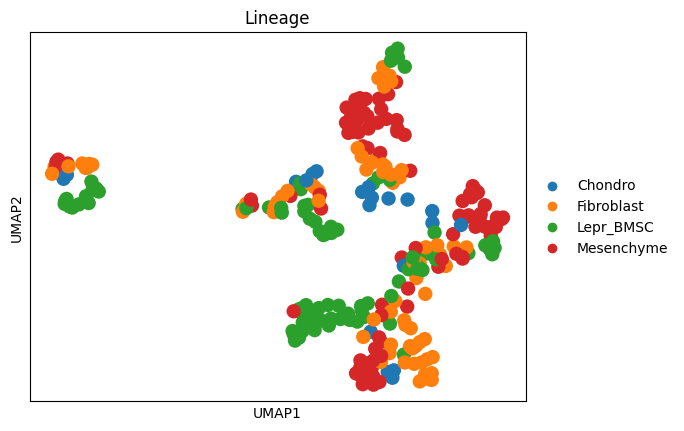

In [80]:
sc.pl.umap(peak,color="Lineage")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


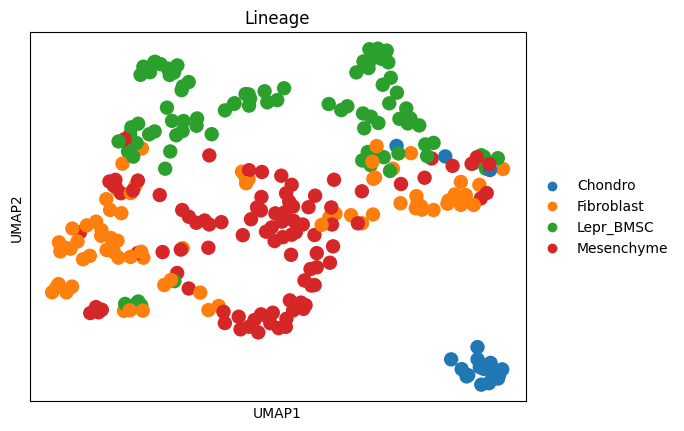

In [81]:
sc.pl.umap(coor,color="Lineage")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


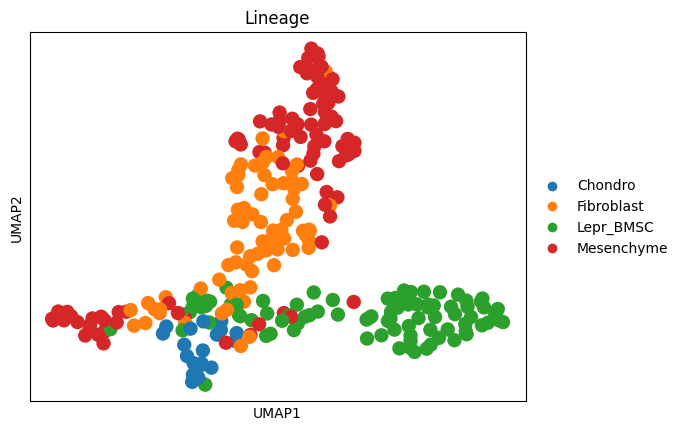

In [82]:
sc.pl.umap(trav,color="Lineage")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


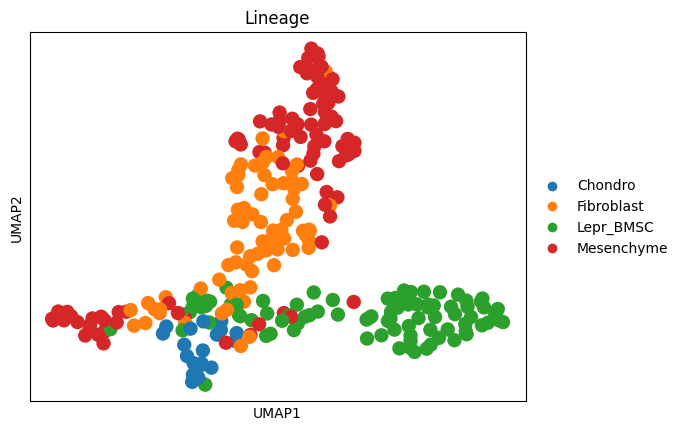

In [83]:
sc.pl.umap(trav,color="Lineage")

In [84]:
mu.pp.neighbors(trajMap,n_multineighbors=20)

In [85]:
mu.tl.umap(trajMap)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


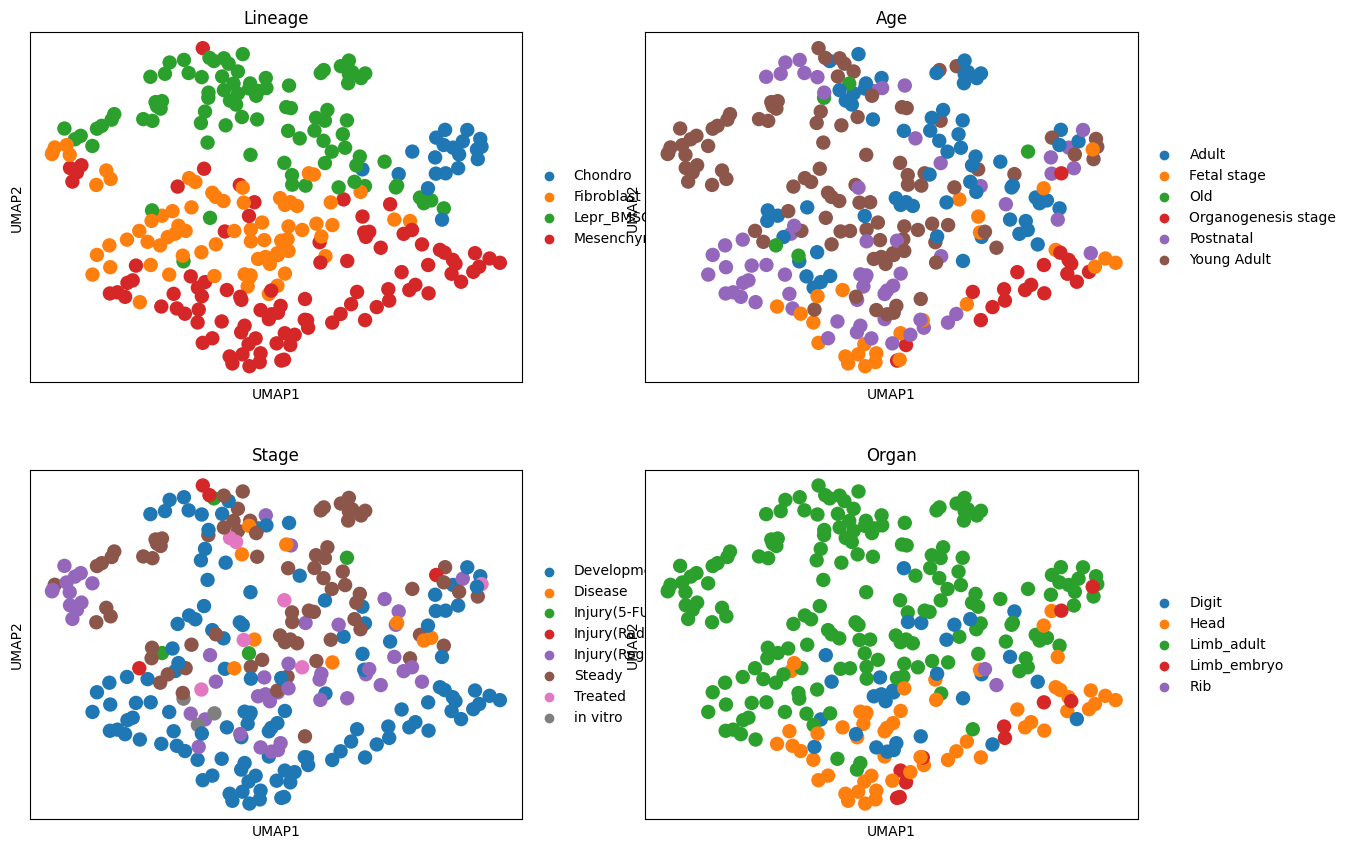

In [91]:
sc.pl.umap(trajMap,color=["Lineage","Age","Stage","Organ"],ncols=2)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


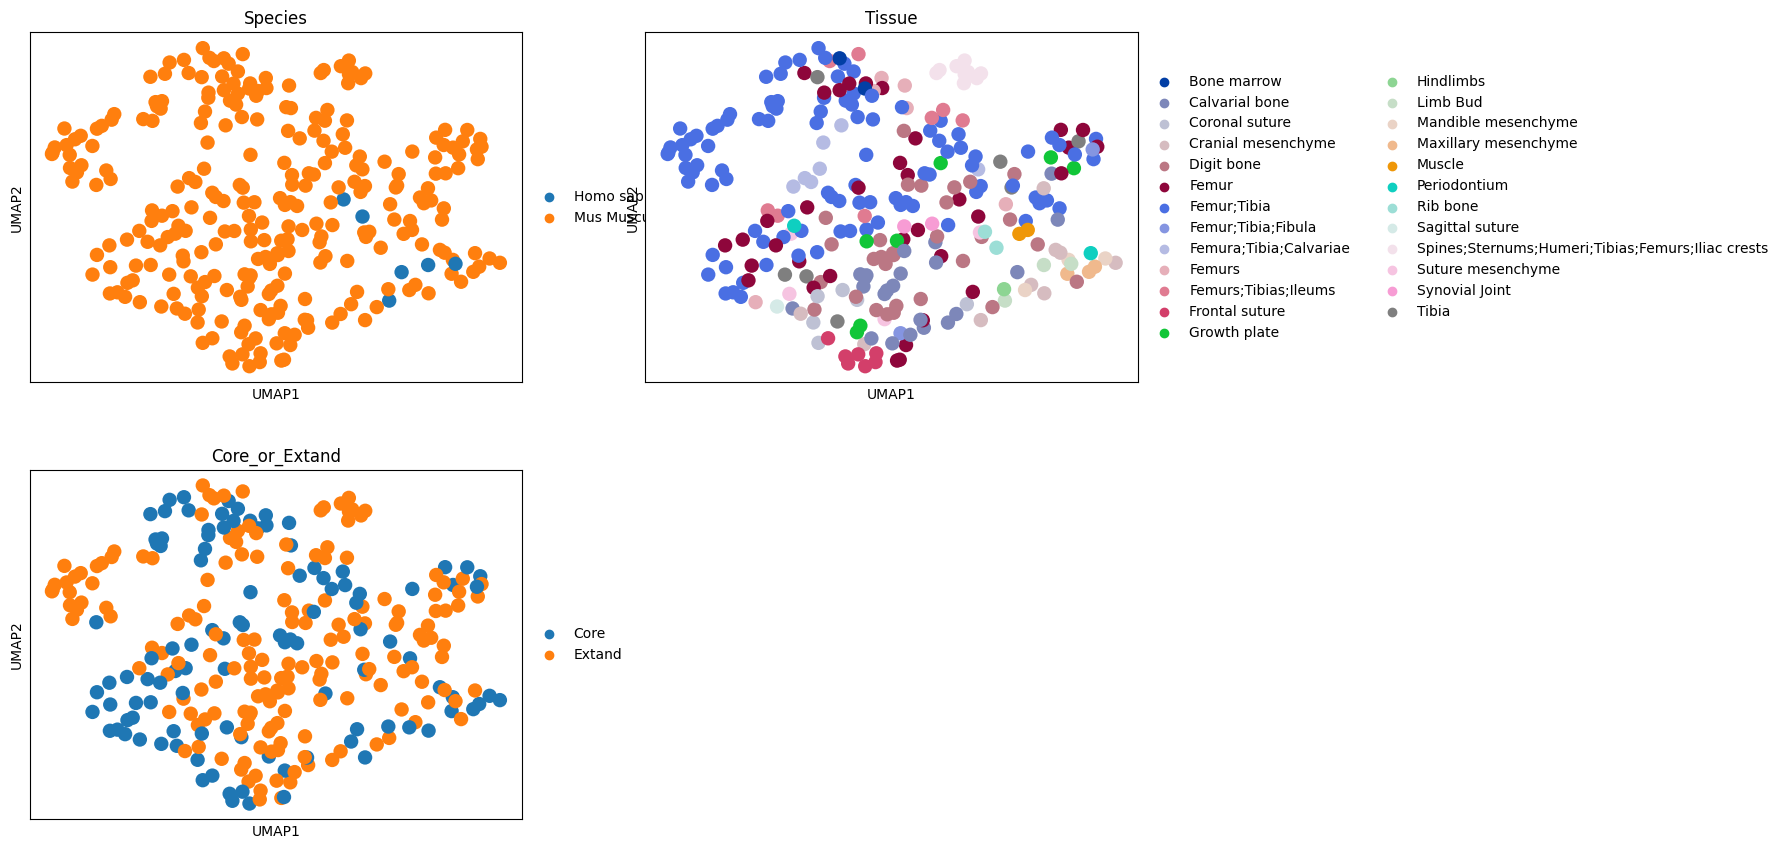

In [98]:
sc.pl.umap(trajMap,color=['Species',"Tissue","Core_or_Extand"],ncols=2)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


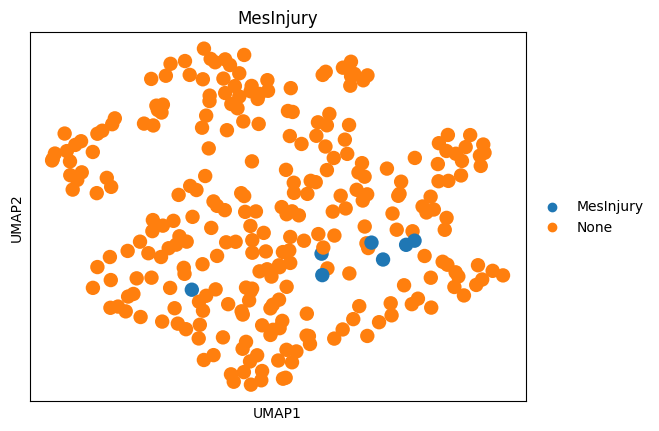

In [117]:
sc.pl.umap(trajMap,color=['MesInjury'],ncols=2)

In [99]:
coor.obsm["X_umap_orig"]=coor.obsm["X_umap"]

In [100]:
coor.obsm["X_umap"]=trajMap.obsm["X_umap"]

In [101]:
peak.obsm["X_umap_bk"]=peak.obsm["X_umap"]

In [102]:
peak.obsm["X_umap"]=trajMap.obsm["X_umap"]

In [103]:
expr.obsm["X_umap_bk"]=expr.obsm["X_umap"]
expr.obsm["X_umap"]=trajMap.obsm["X_umap"]

In [104]:
trav.obsm["X_umap_bk"]=trav.obsm["X_umap"]
trav.obsm["X_umap"]=trajMap.obsm["X_umap"]

In [149]:
sampleDf["Stage"]

Maxillary_Bian_E11.5_sep_Mesenchyme            Development
coronal_Holmes_P28_sep_Mesenchyme              Development
BmscMds_Hayashi_TG_A2_sep_Lepr_BMSC                Disease
Mandible2020_Chai_E12_sep_Mesenchyme           Development
Frontal_Holmes_WTE18.5_4_sep_Mesenchyme        Development
                                                  ...     
Septoclasts_Kishor_Pdgfra_sep_Lepr_BMSC        Development
Septoclasts_Kishor_Longbone1_sep_Fibroblast    Development
lambdoid_Holmes_P10_sep_Mesenchyme             Development
BmscDiffereation_Wolock_sep_Lepr_BMSC               Steady
Mandible2020_Chai_sep_Mesenchyme               Development
Name: Stage, Length: 274, dtype: category
Categories (8, object): ['Development', 'Disease', 'Injury(5-FU)', 'Injury(Radiation)', 'Injury(Regeneration)', 'Steady', 'Treated', 'in vitro']

In [155]:
import numpy as np
np.sum((sampleDf["Lineage"]=="Mesenchyme") & (sampleDf["Stage"]=="Injury(Regeneration)"))

15

In [156]:
sampleDf.index[(sampleDf["Lineage"]=="Mesenchyme") & (sampleDf["Stage"]=="Injury(Regeneration)")]

Index(['DigitLmx1b_Miller_Pdgfra_sep_Mesenchyme',
       'Digit2019_Storer_Gen14DPAcreDmp1_sep_Mesenchyme',
       'DigitRegeneration_Johnson_12dpa_sep_Mesenchyme',
       'Digit2019_Storer_Gen14DPA1_sep_Mesenchyme',
       'DigitLmx1b_Miller_Lmx1b_sep_Mesenchyme',
       'DigitRegeneration_Johnson_17dpa_sep_Mesenchyme',
       'LimbImplant_VesPrey_Tmem100_sep_Mesenchyme',
       'Septoclasts_Kishor_Fracture1_sep_Mesenchyme',
       'Septoclasts_Kishor_Fracture2_sep_Mesenchyme',
       'Septoclasts_Kishor_Fracture4_sep_Mesenchyme',
       'Septoclasts_Kishor_Fracture3_sep_Mesenchyme',
       'Digit2019_Storer_Gen28DPA_sep_Mesenchyme',
       'DigitRegeneration_Johnson_14dpa_sep_Mesenchyme',
       'DigitRegeneration_Johnson_11dpa_sep_Mesenchyme',
       'Digit2019_Storer_Gen10DPA_sep_Mesenchyme'],
      dtype='object')

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


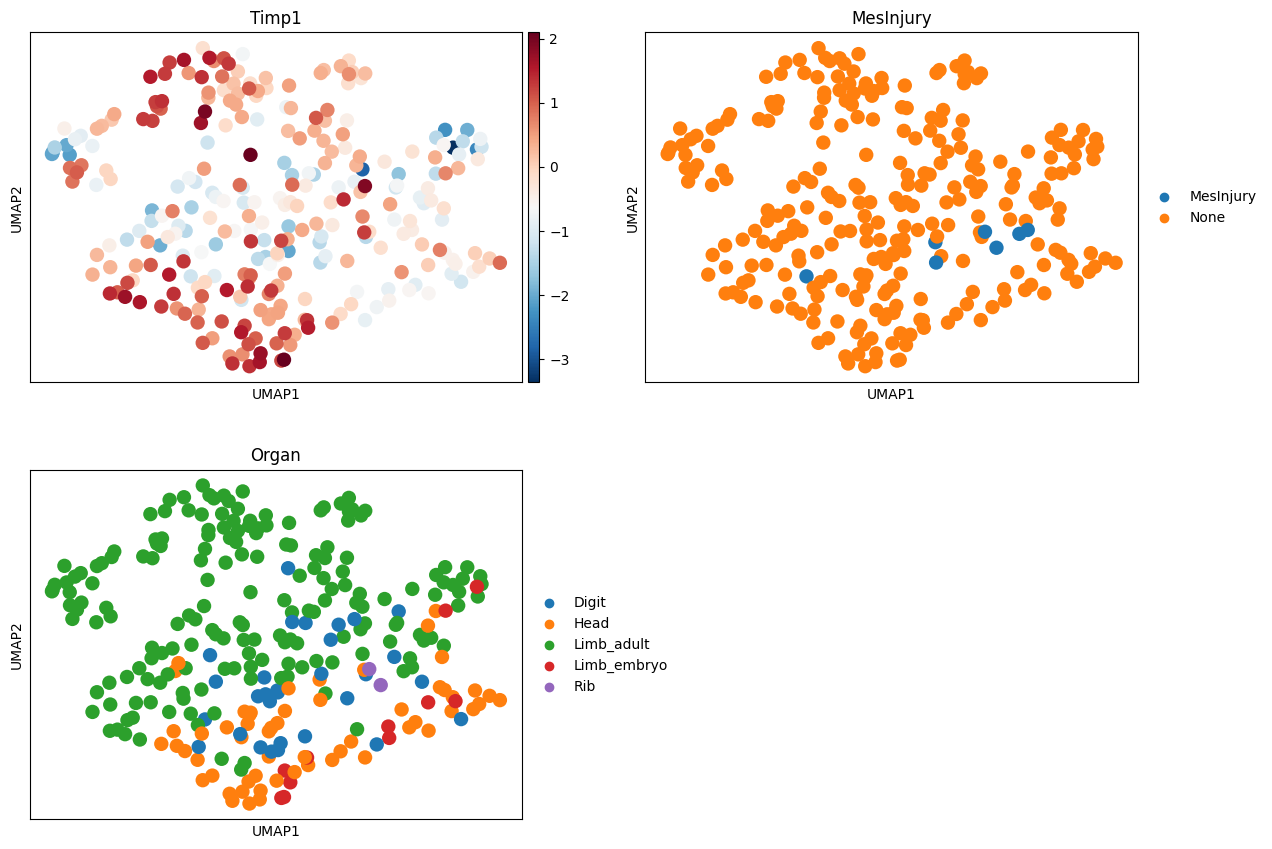

In [139]:
sc.pl.umap(coor,color=["Timp1","MesInjury","Organ"],ncols=2,cmap="RdBu_r",layer="raw")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


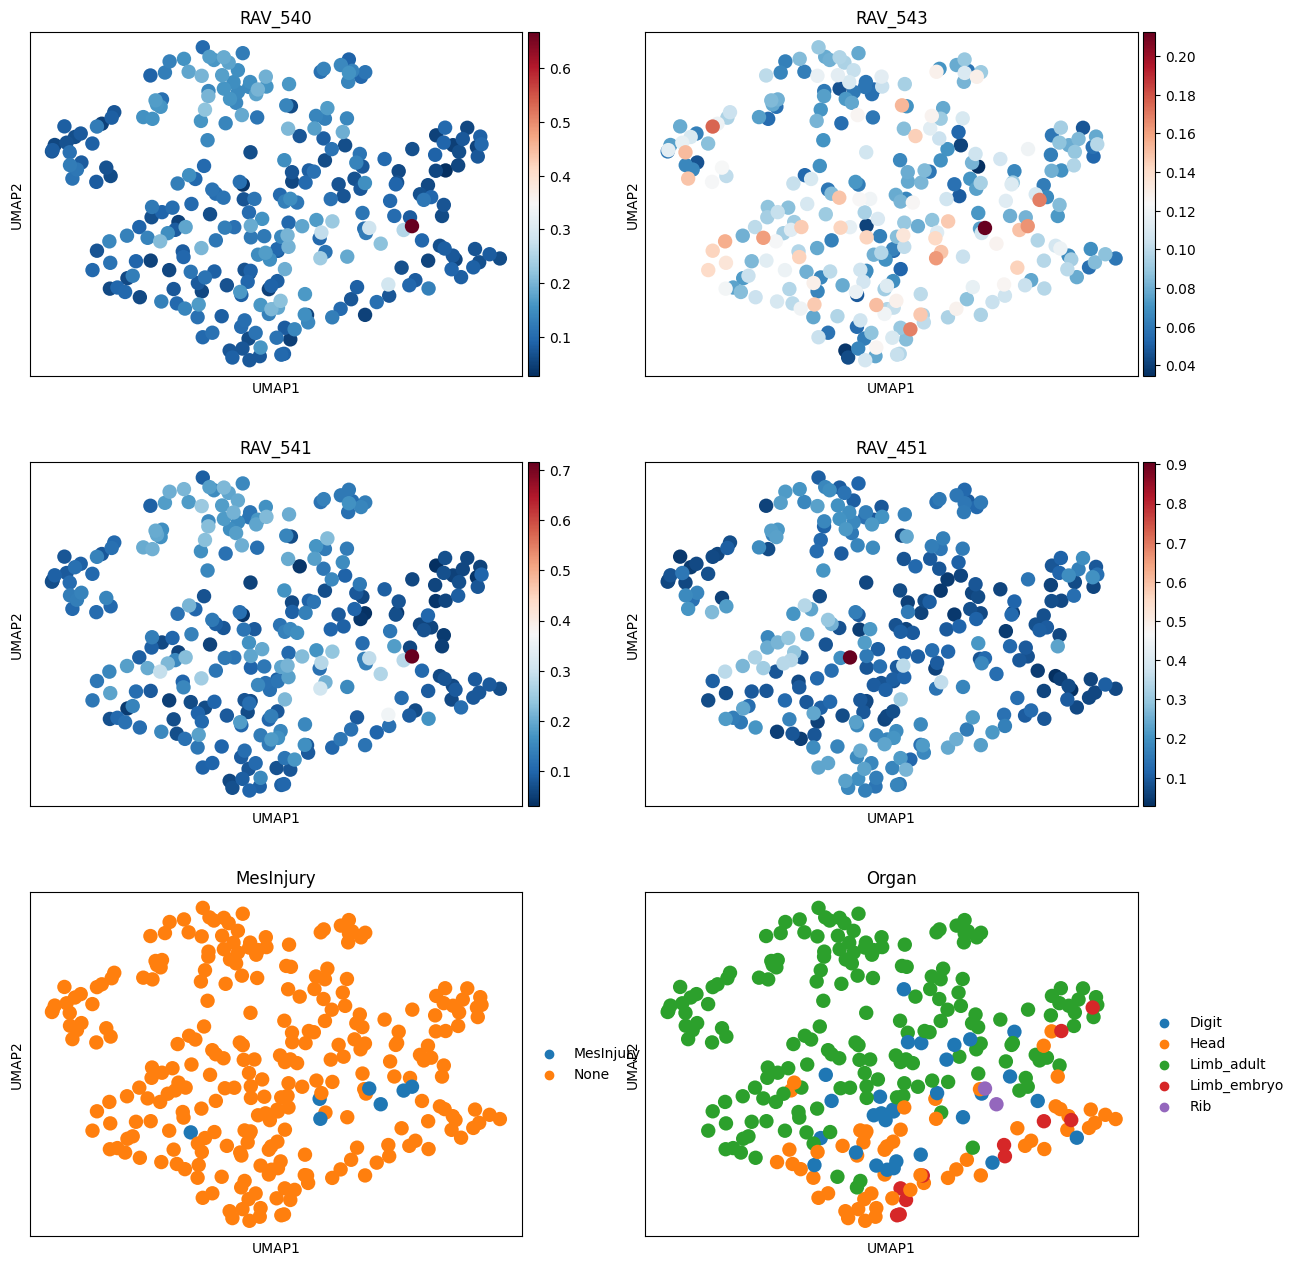

In [140]:
sc.pl.umap(trav,color=["RAV_540","RAV_543","RAV_541","RAV_451","MesInjury","Organ"],ncols=2,cmap="RdBu_r",layer="raw")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


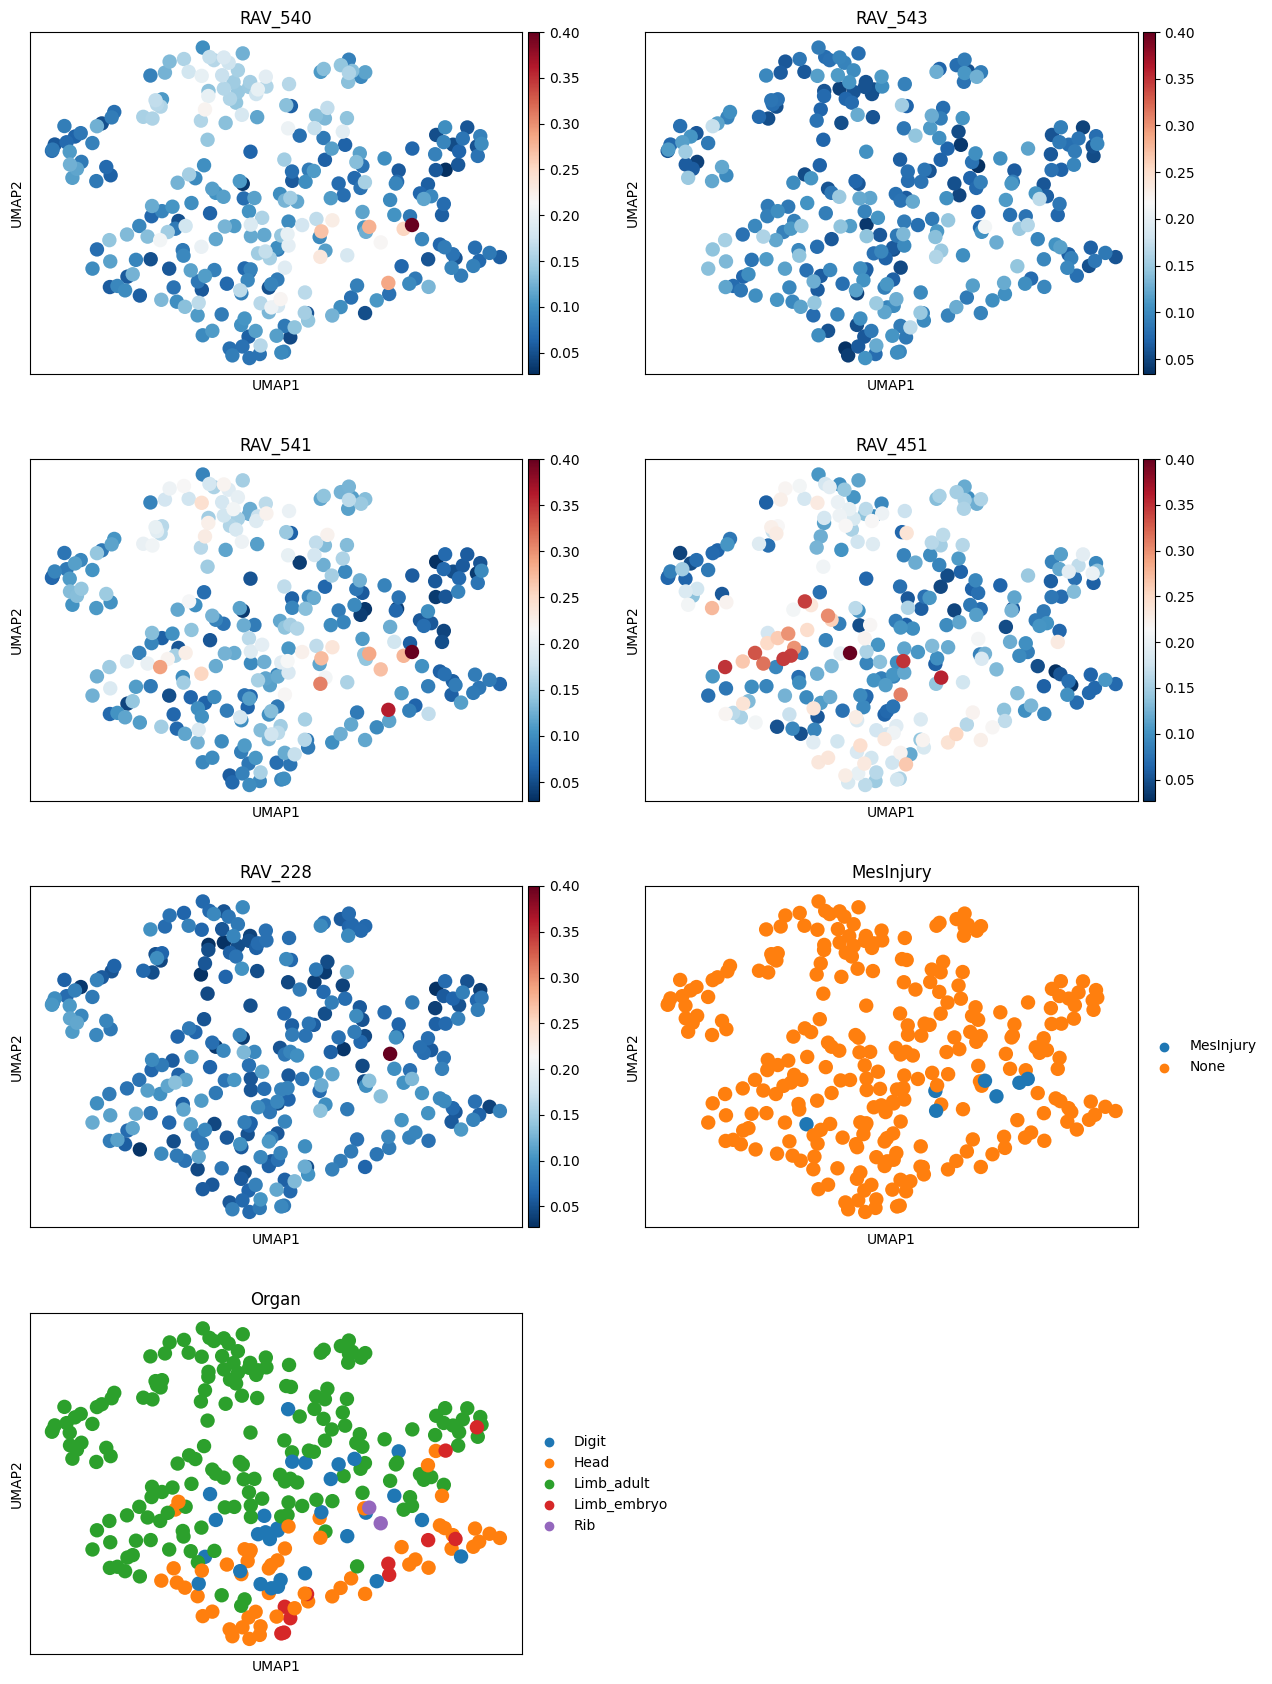

In [147]:
sc.pl.umap(trav,color=["RAV_540","RAV_543","RAV_541","RAV_451","RAV_228","MesInjury","Organ"],ncols=2,cmap="RdBu_r",layer="raw",vmax=0.4)

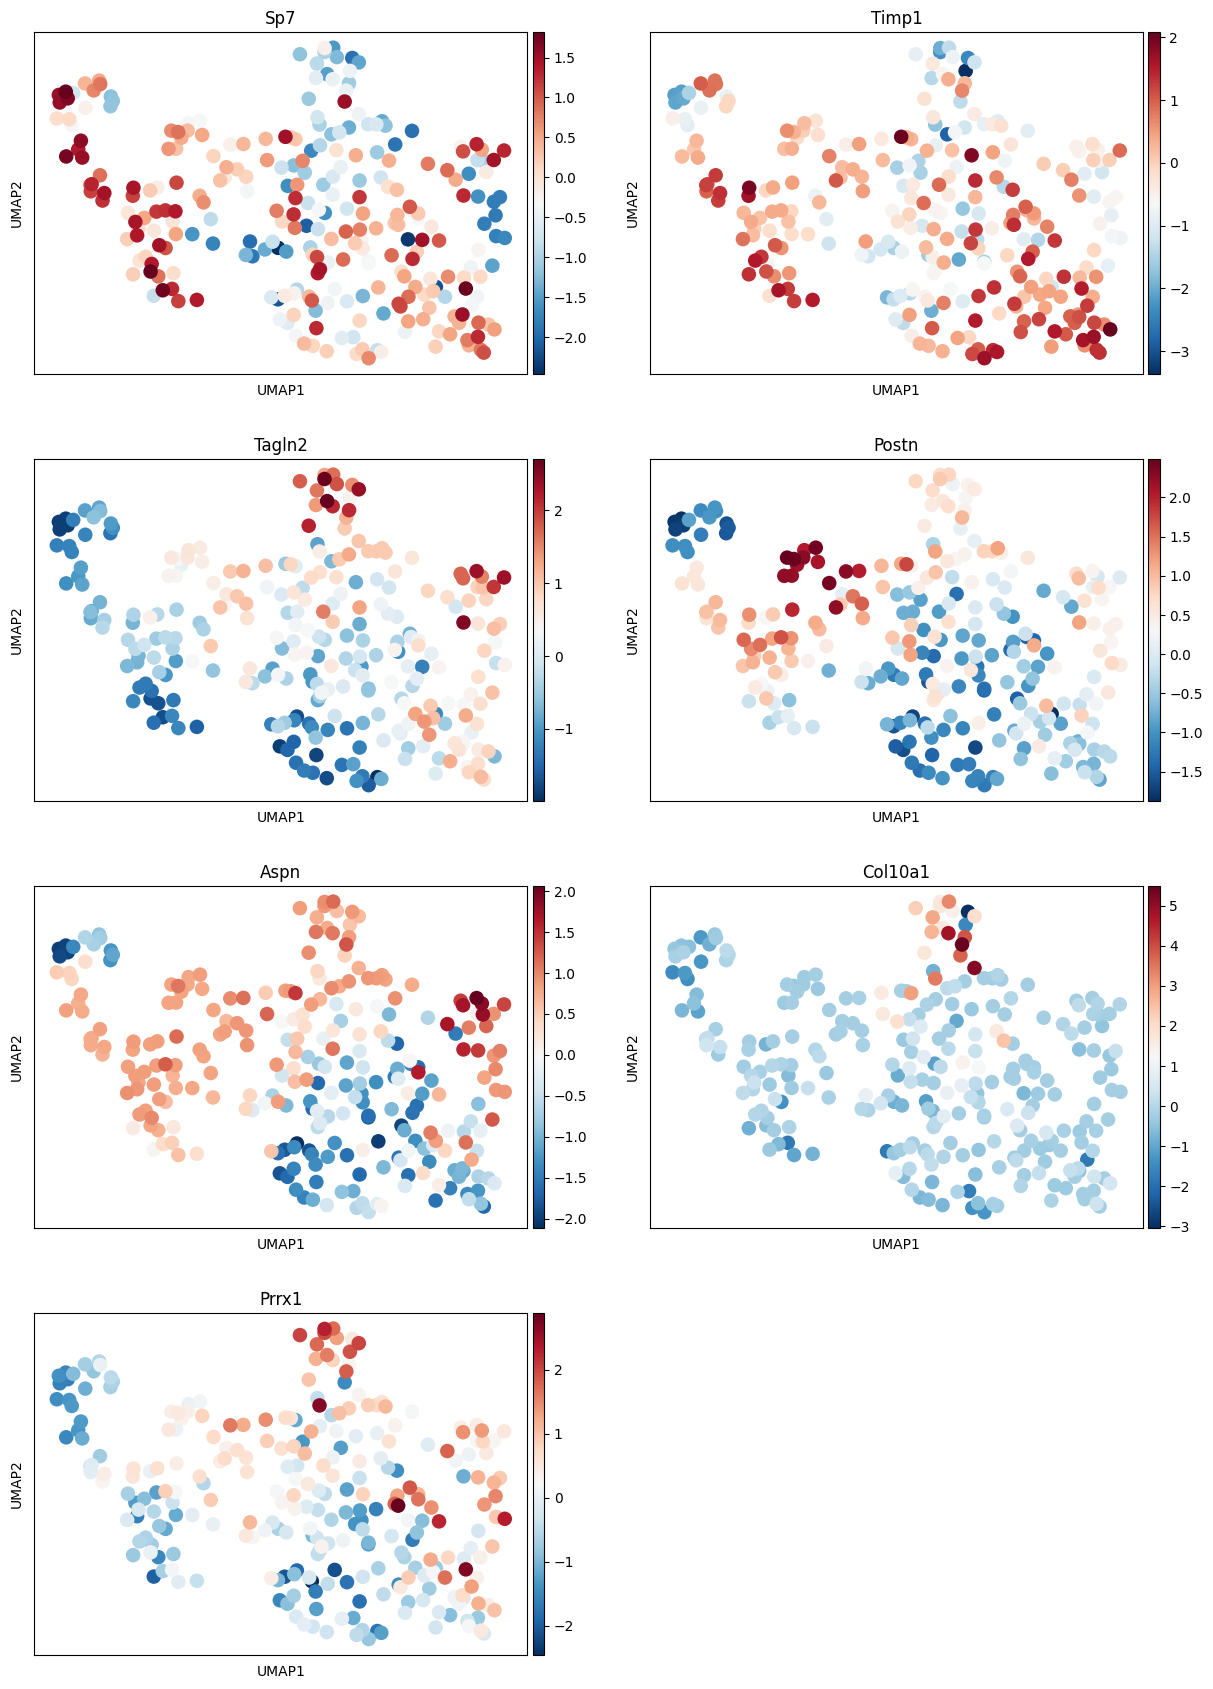

In [82]:
sc.pl.umap(coor,color=["Sp7","Timp1","Tagln2","Postn","Aspn","Col10a1","Prrx1"],ncols=2,cmap="RdBu_r")

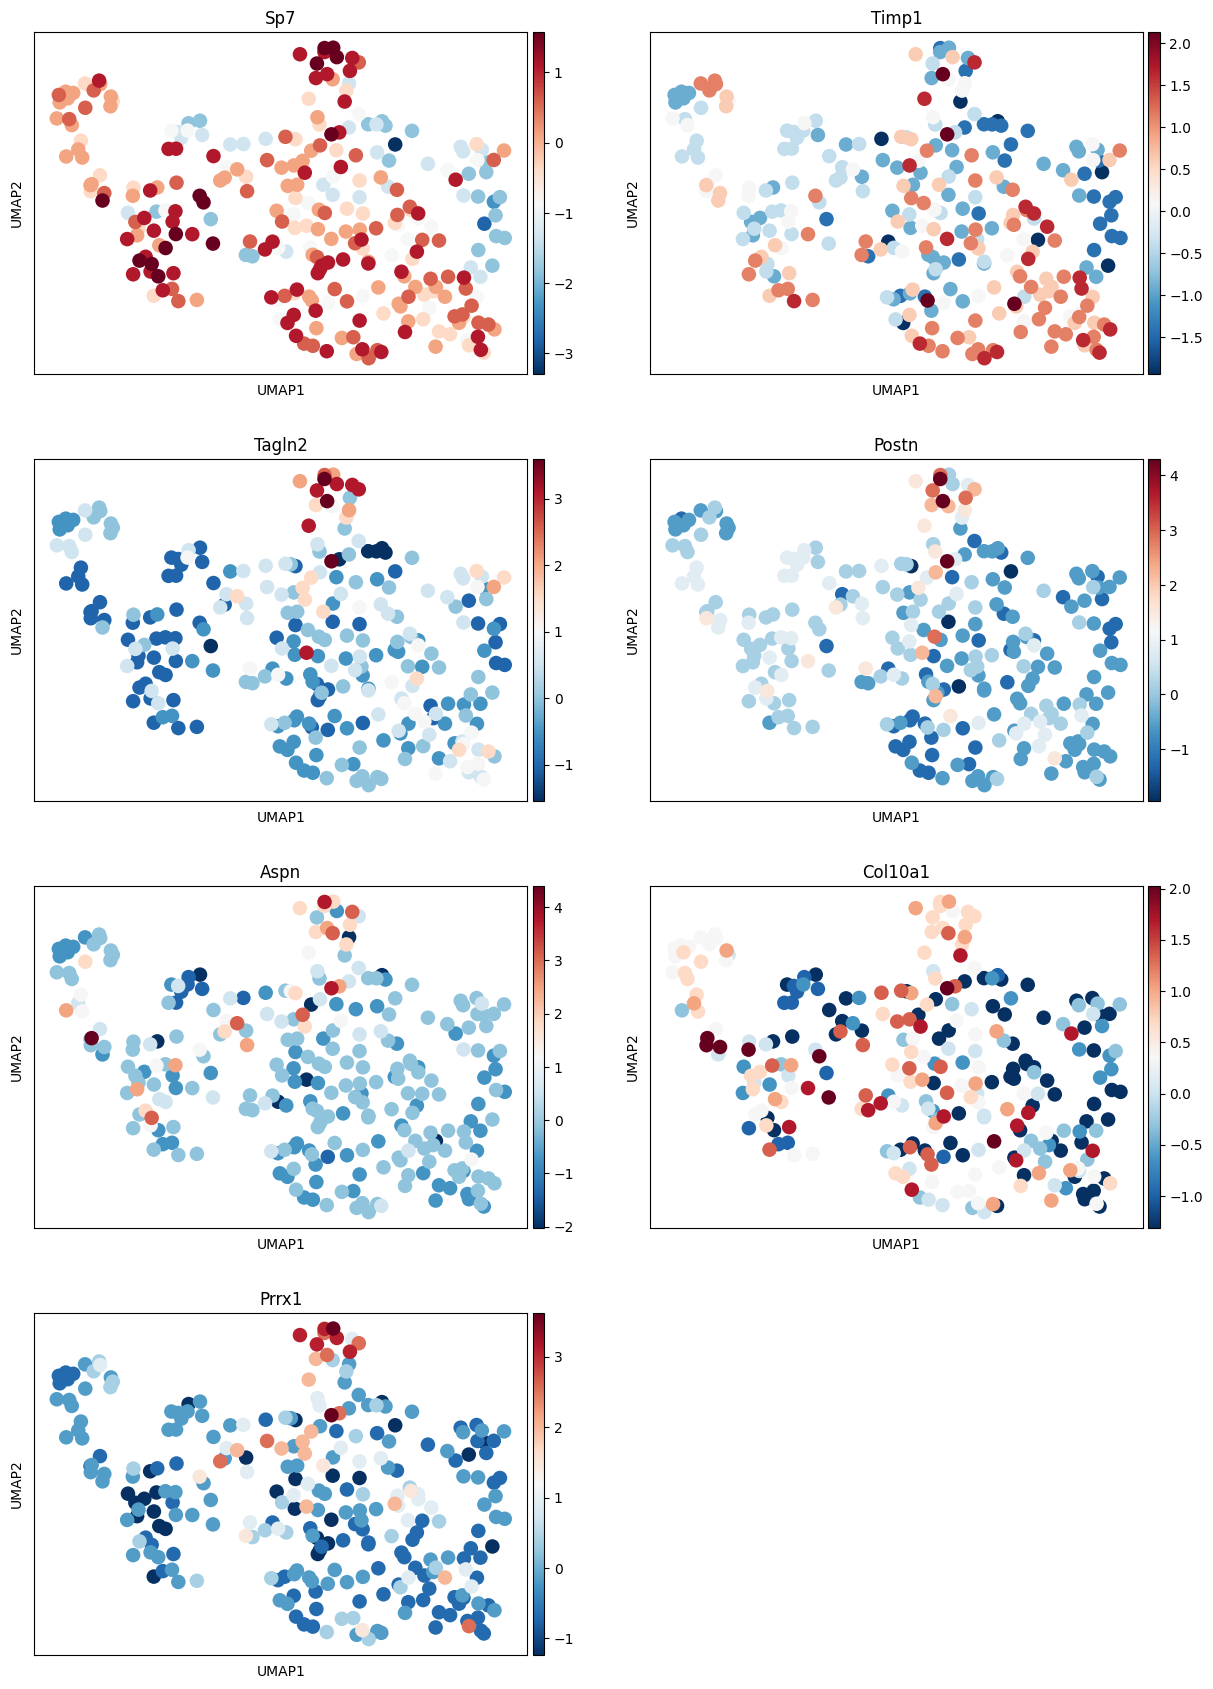

In [87]:
sc.pl.umap(peak,color=["Sp7","Timp1","Tagln2","Postn","Aspn","Col10a1","Prrx1"],ncols=2,cmap="RdBu_r")

In [88]:
trajMap.write_h5mu("../process_data/trajMap/trajMap_1.h5mu")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


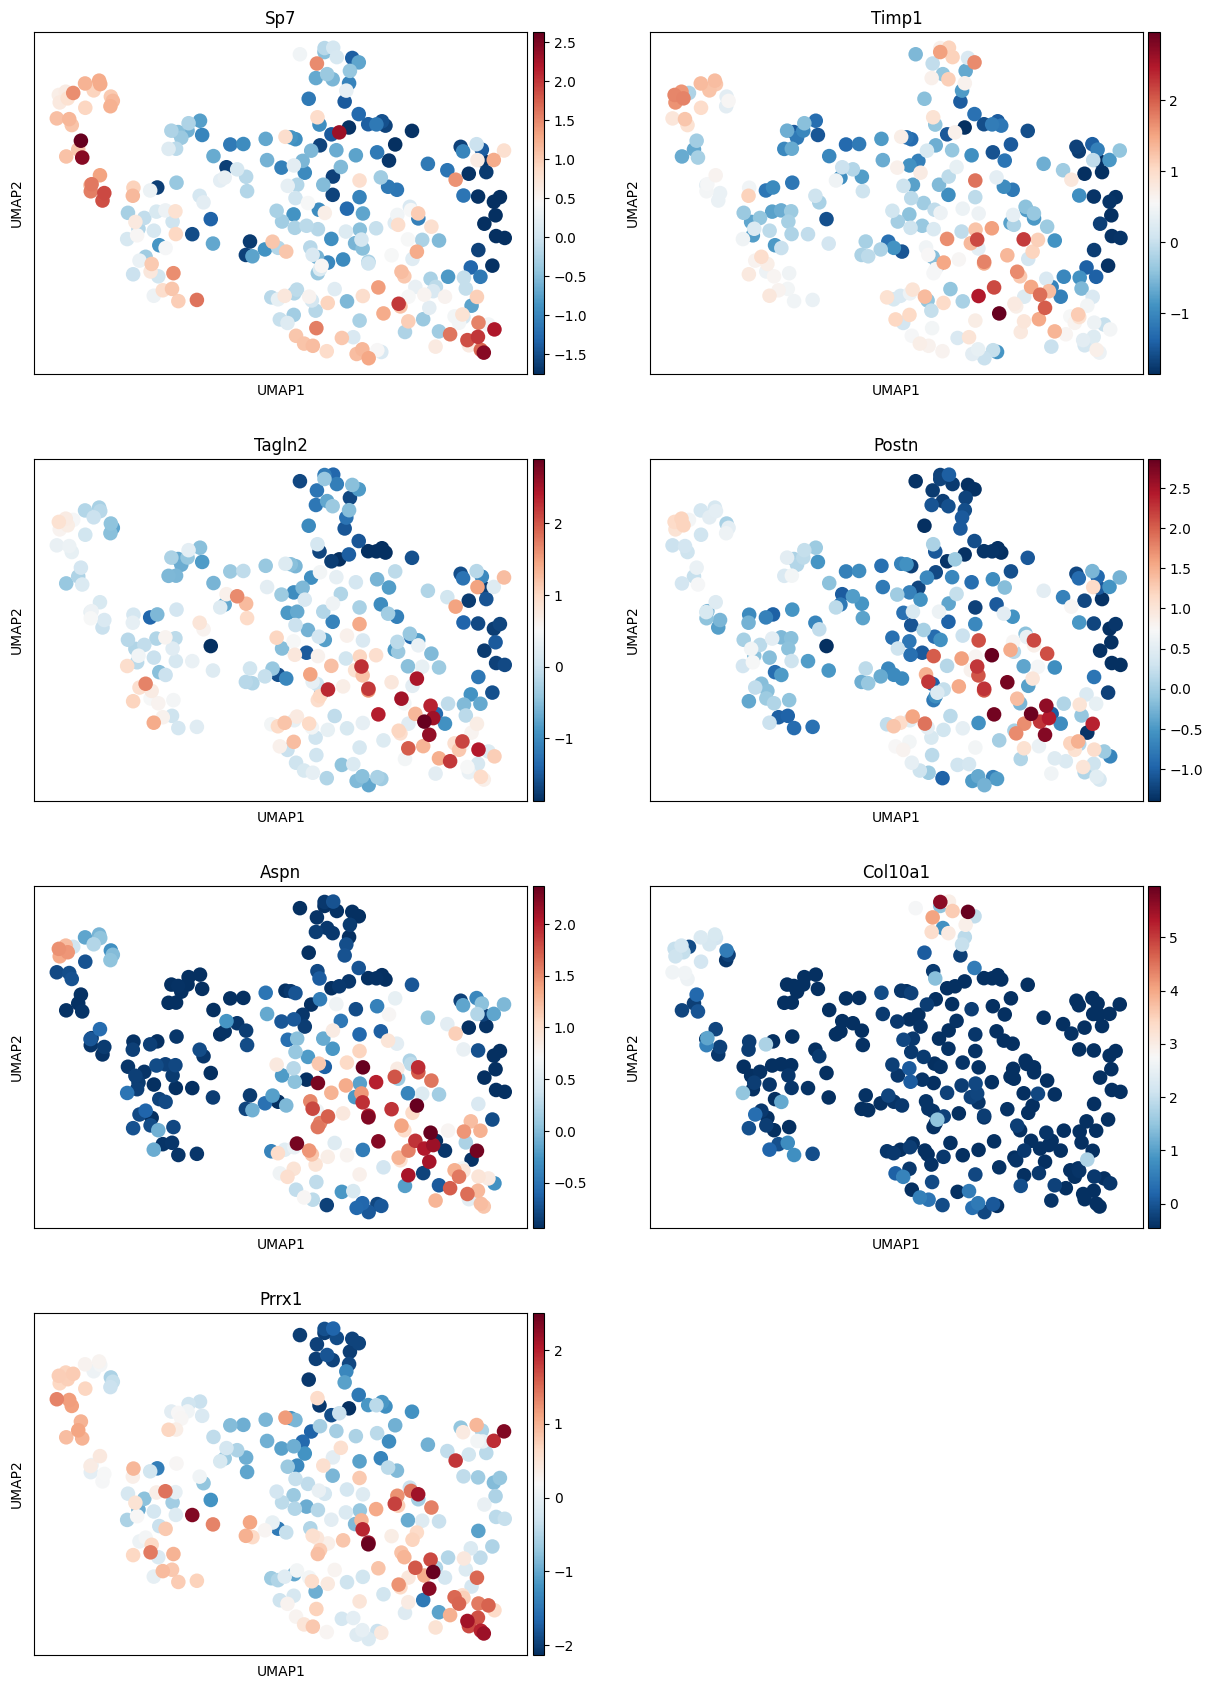

In [90]:
sc.pl.umap(expr,color=["Sp7","Timp1","Tagln2","Postn","Aspn","Col10a1","Prrx1"],ncols=2,cmap="RdBu_r")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


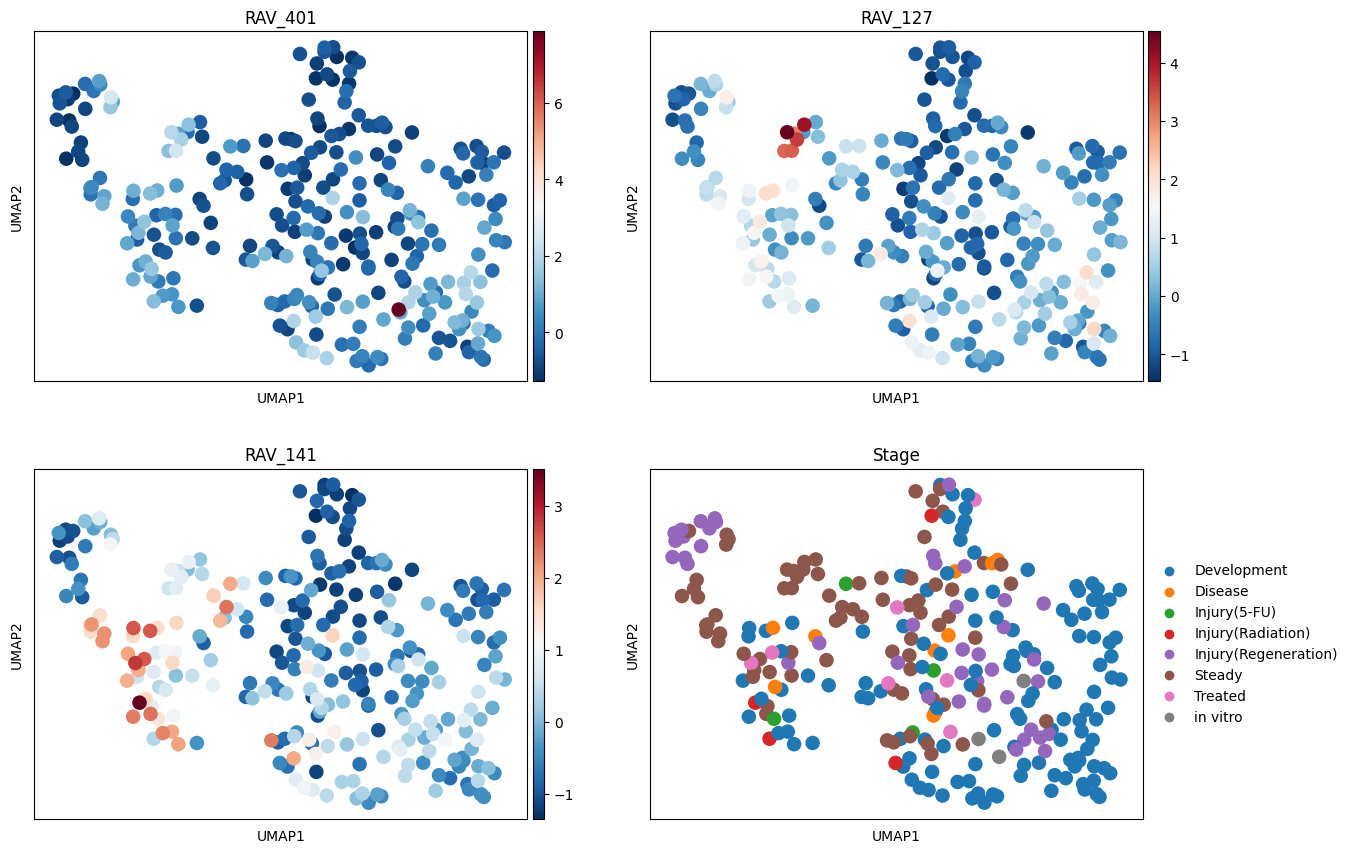

In [133]:
sc.pl.umap(trav,color=["RAV_401","RAV_127","RAV_141","Stage"],ncols=2,cmap="RdBu_r")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


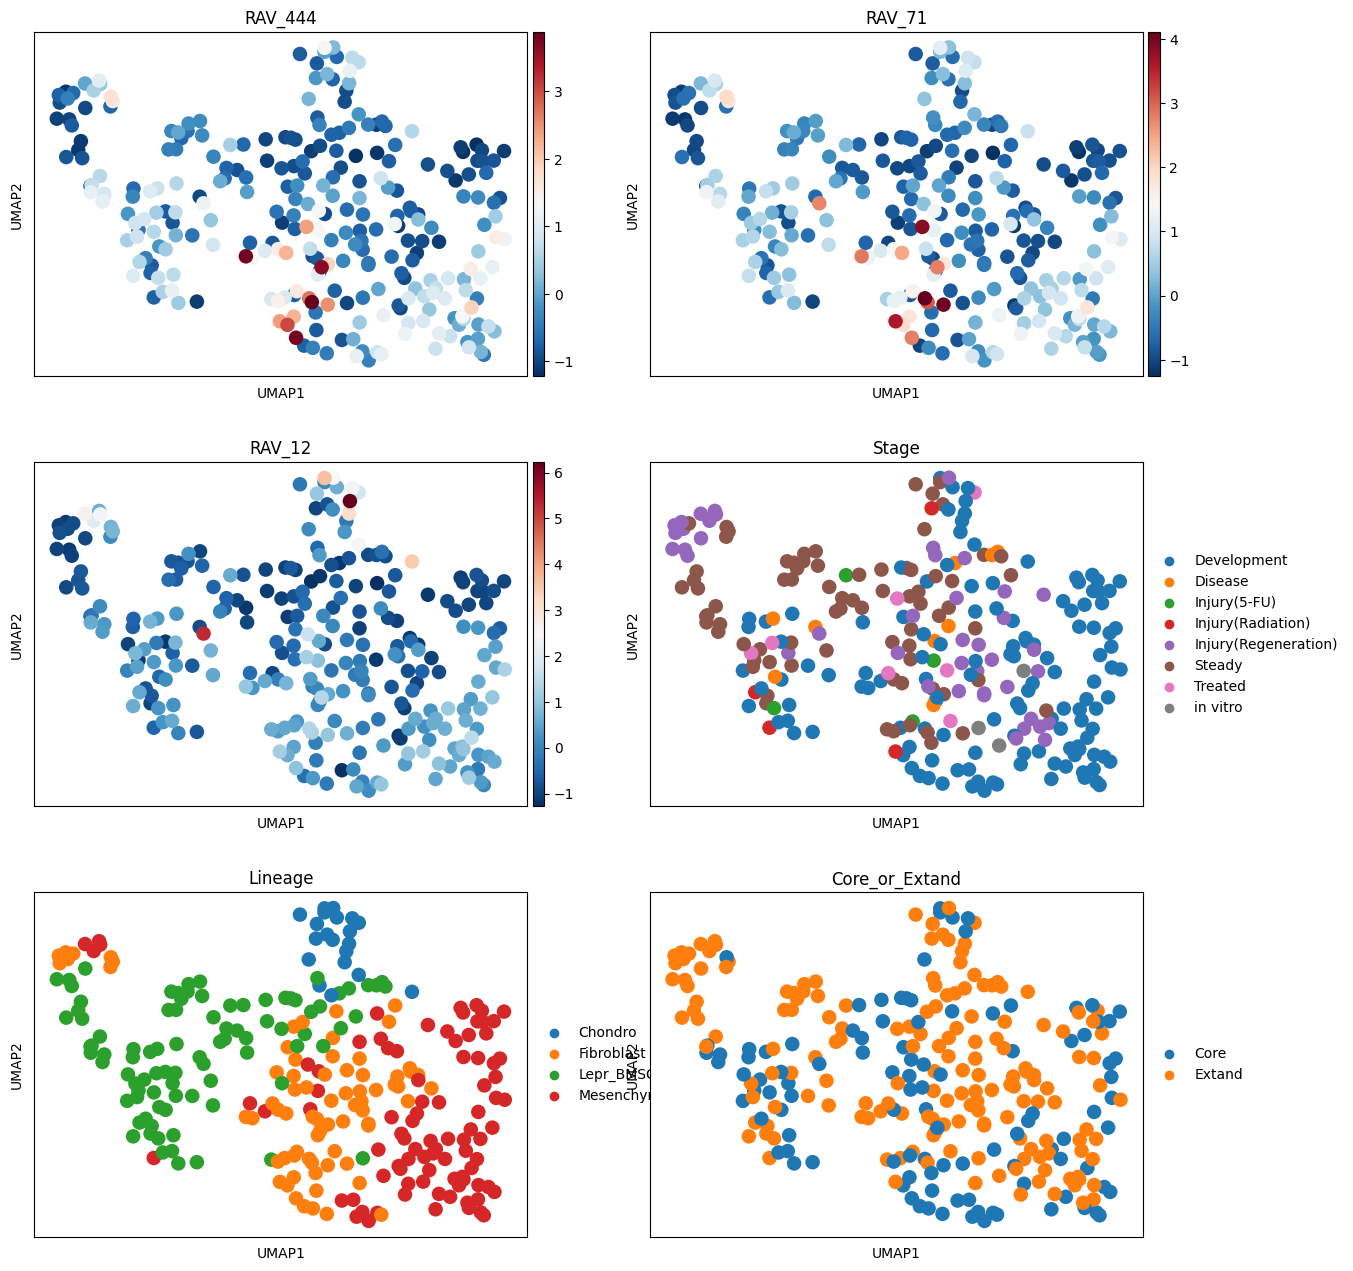

In [140]:
sc.pl.umap(trav,color=["RAV_444","RAV_71","RAV_12","Stage","Lineage","Core_or_Extand"],ncols=2,cmap="RdBu_r")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


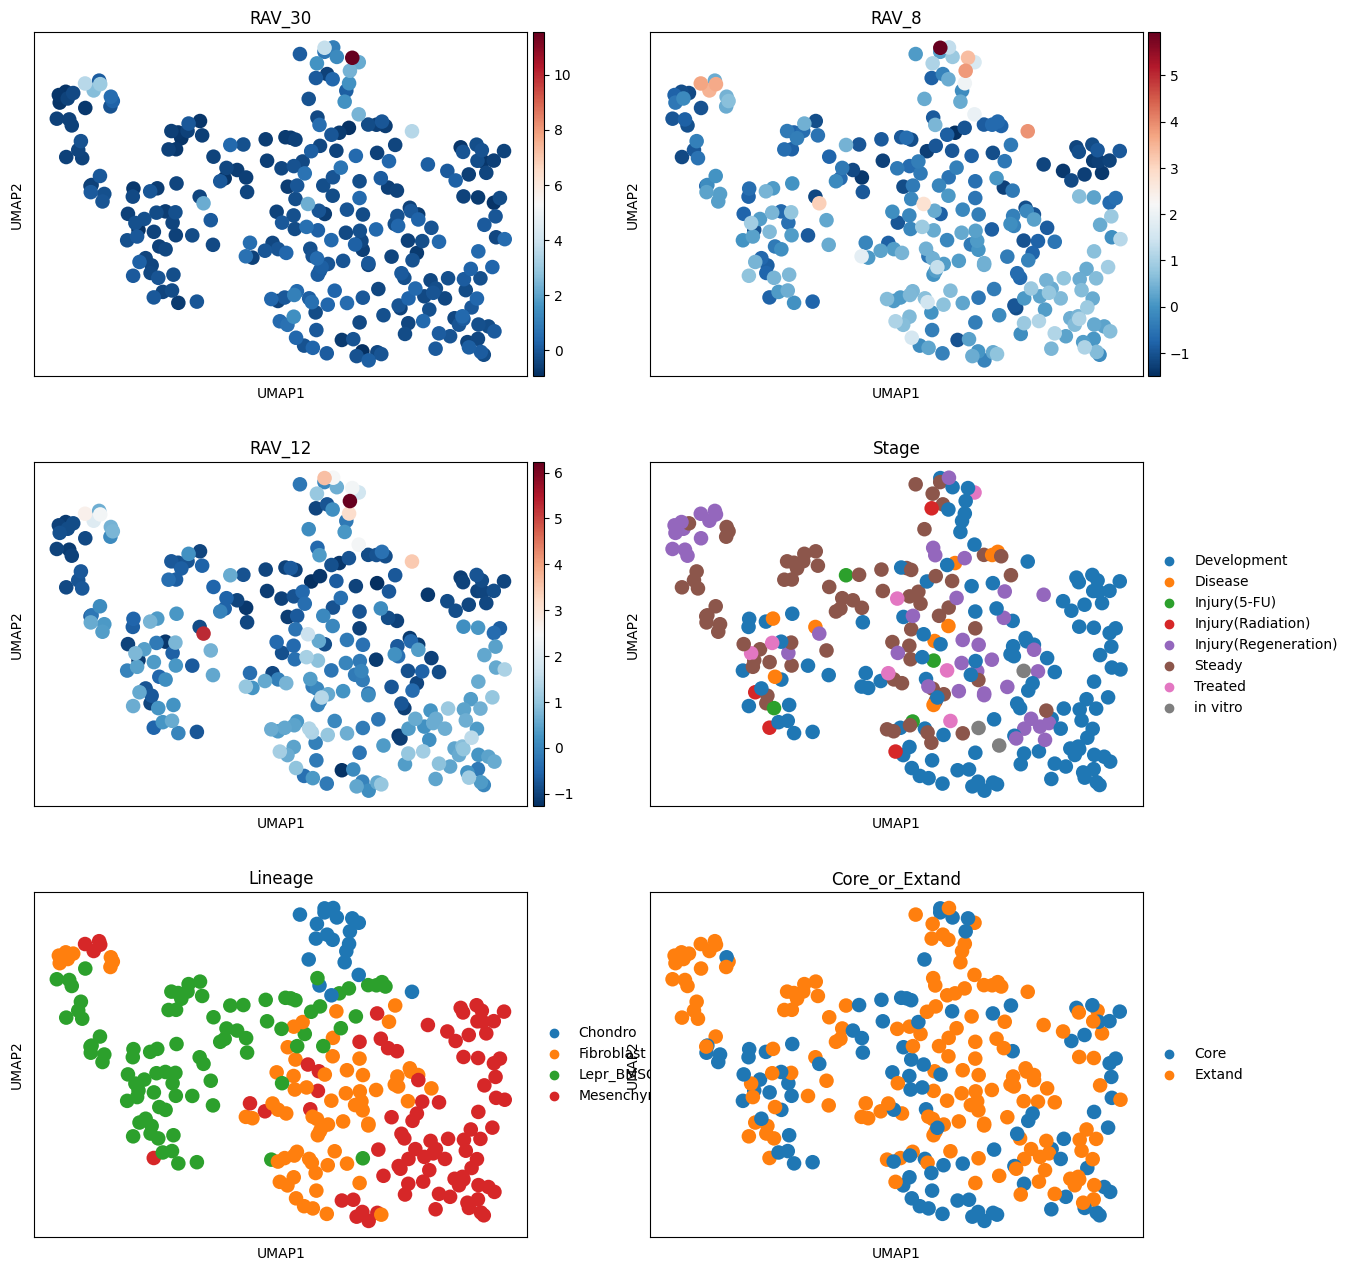

In [141]:
sc.pl.umap(trav,color=["RAV_30","RAV_8","RAV_12","Stage","Lineage","Core_or_Extand"],ncols=2,cmap="RdBu_r")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


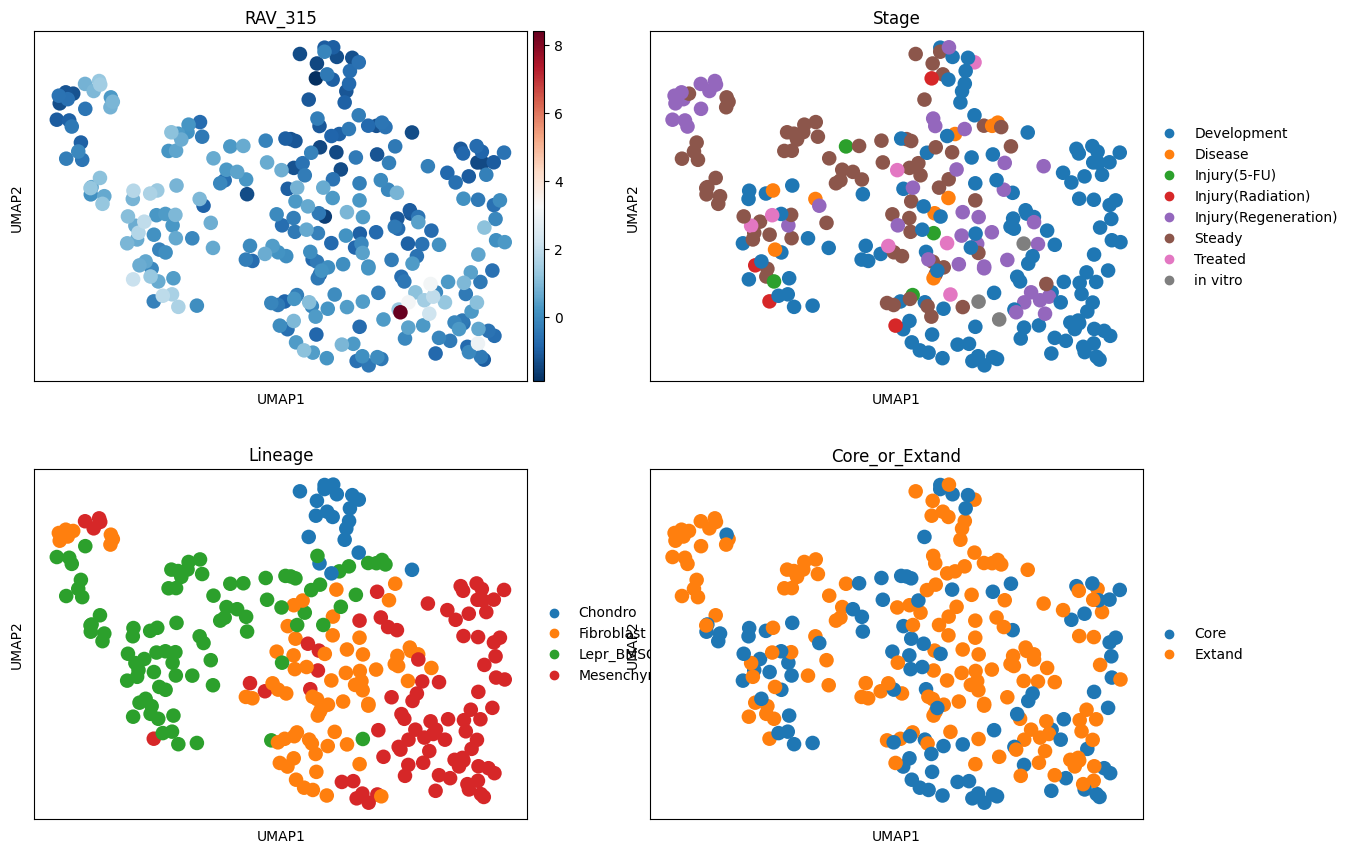

In [162]:
sc.pl.umap(trav,color=["RAV_315","Stage","Lineage","Core_or_Extand"],ncols=2,cmap="RdBu_r")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


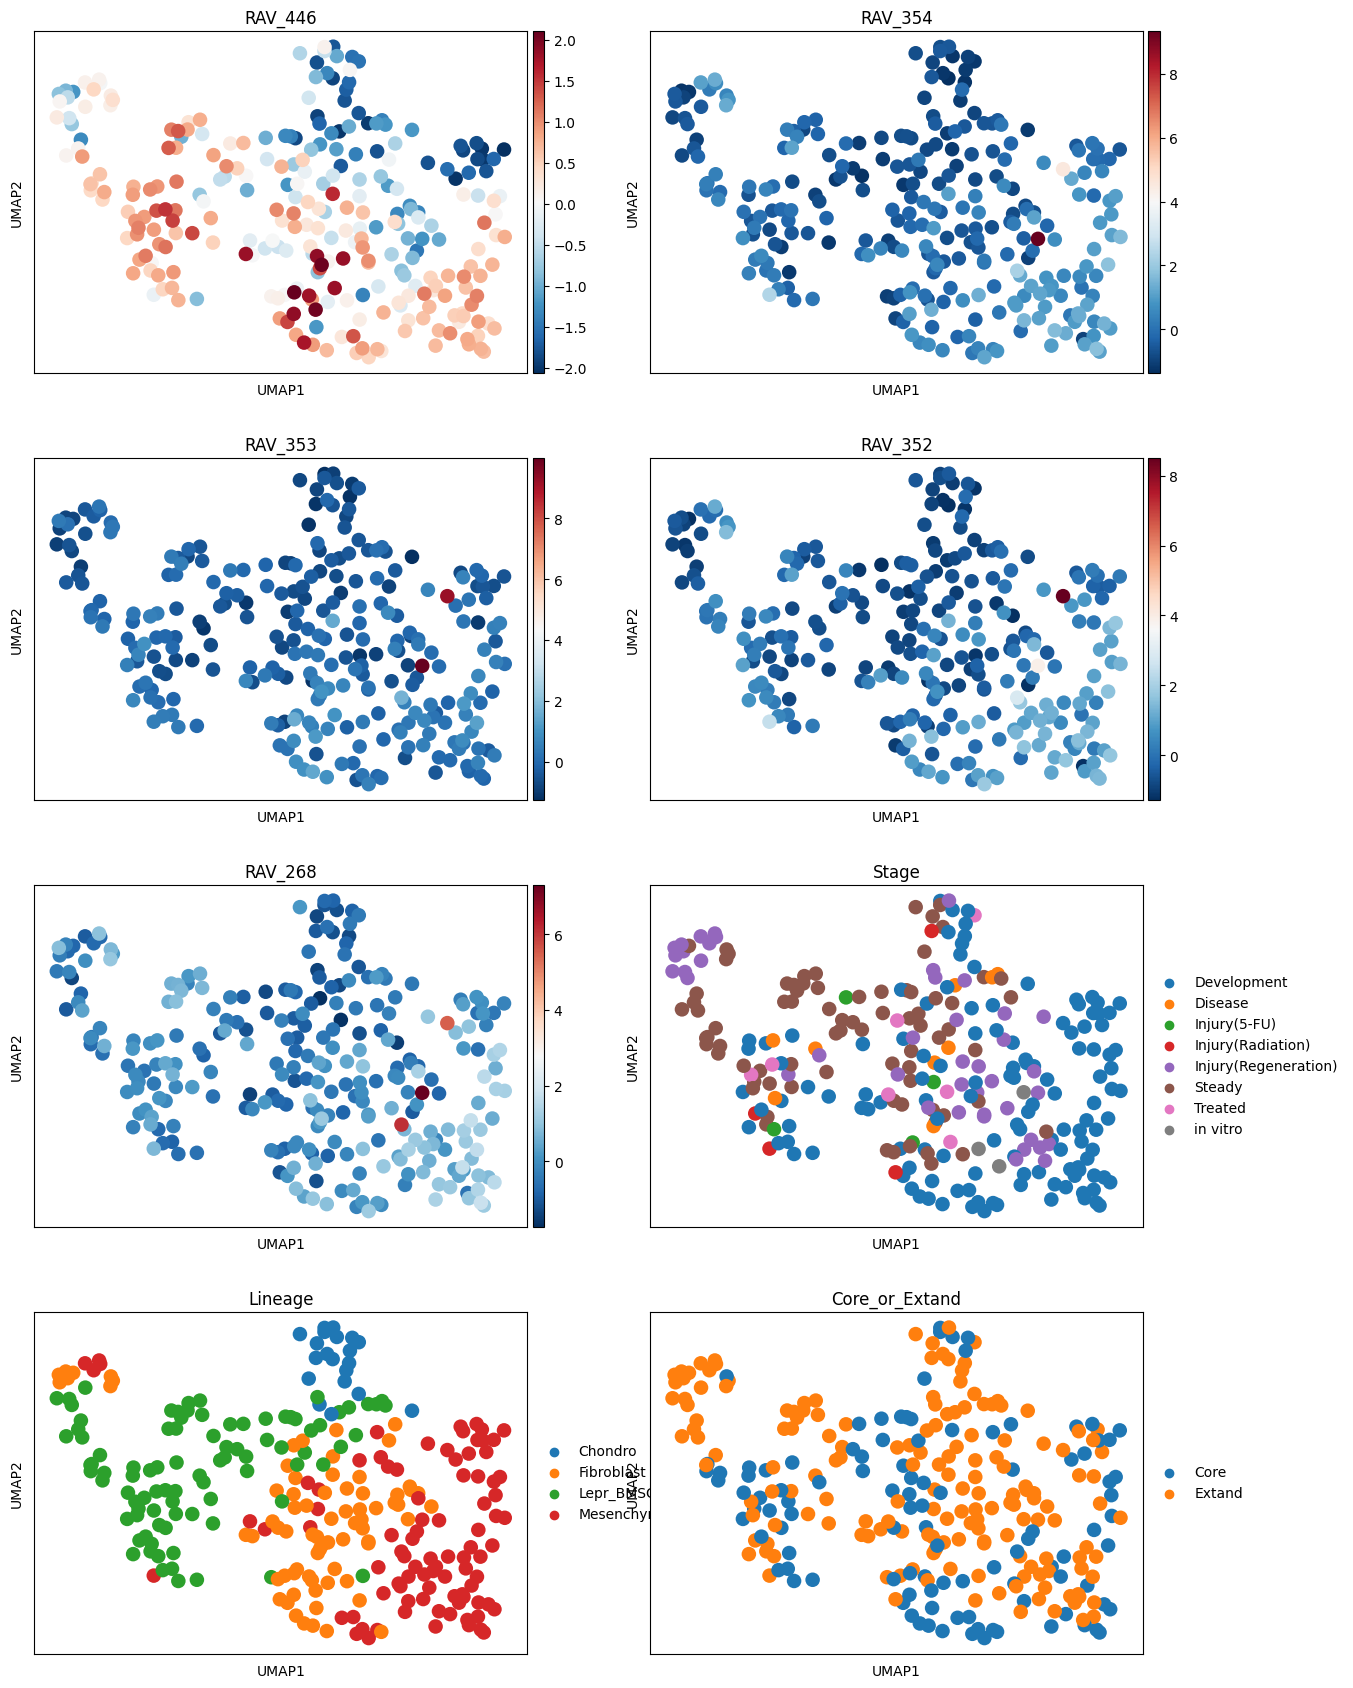

In [147]:
sc.pl.umap(trav,color=["RAV_446","RAV_354","RAV_353","RAV_352","RAV_268","Stage","Lineage","Core_or_Extand"],ncols=2,cmap="RdBu_r")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


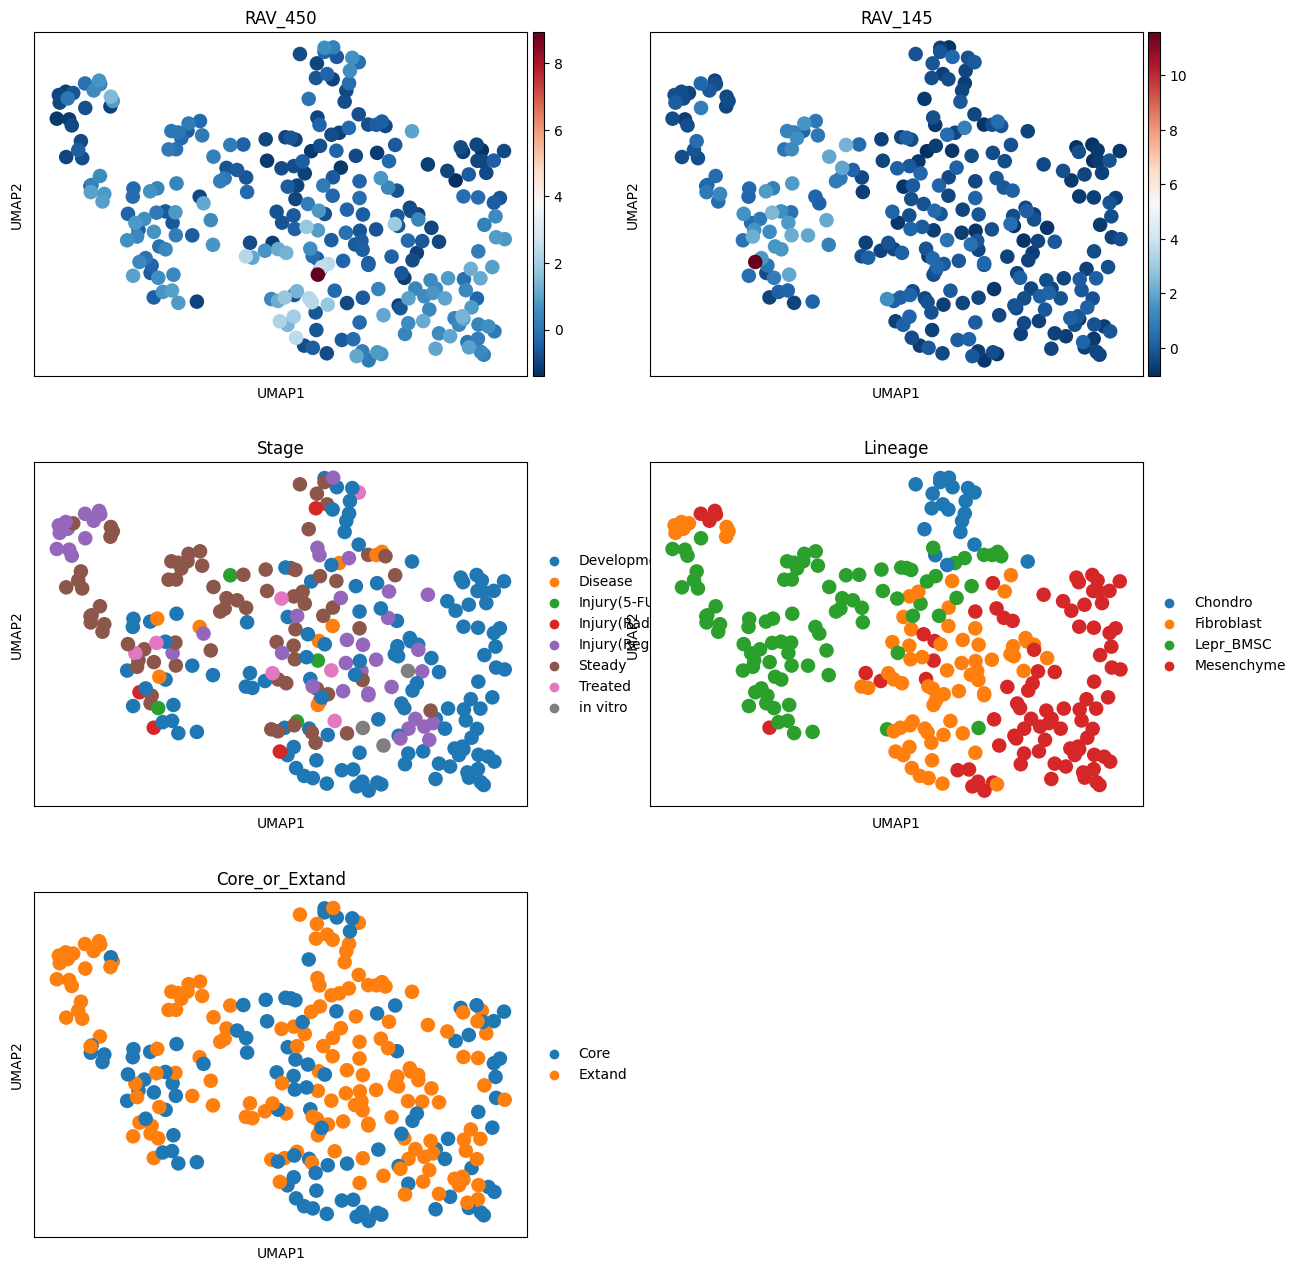

In [159]:
sc.pl.umap(trav,color=["RAV_450","RAV_145","Stage","Lineage","Core_or_Extand"],ncols=2,cmap="RdBu_r")

In [148]:
travMatrix3=pd.read_csv("../process_data/trajMap/1.12_valAll_extend.csv",index_col=0)

In [160]:
travMatrix3.columns=result_list

In [164]:
travMatrix3=travMatrix3[newName]

In [168]:
travExtend=sc.AnnData(travMatrix3.T.copy())

In [169]:
travExtend.layers["raw"]=travMatrix3.T.copy()

In [170]:
sc.pp.scale(travExtend)
sc.tl.pca(travExtend, n_comps=10, svd_solver="auto")
sc.pp.neighbors(travExtend, metric="cosine")
sc.tl.umap(travExtend)

In [173]:
travExtend

AnnData object with n_obs × n_vars = 280 × 771
    var: 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities'

In [175]:
trajMap.mod["TRAV"]=travExtend

In [180]:
trajMap

MuData object with n_obs × n_vars = 280 × 62763
  obs:	'Organ', 'Stage', 'Age', 'Tissue', 'Tissue(Specific)', 'Gene type', 'Treatment', 'Age(In Detail)', 'Machine', 'Origin', 'Species', 'Sample', 'Lineage', 'Core_or_Extand', 'MesInjury'
  uns:	'neighbors', 'umap', 'Lineage_colors', 'Age_colors', 'Stage_colors', 'Organ_colors', 'Species_colors', 'Tissue_colors', 'Core_or_Extand_colors', 'MesInjury_colors'
  obsm:	'X_umap'
  obsp:	'distances', 'connectivities'
  4 modalities
    coor:	280 x 20664
      obs:	'Organ', 'Stage', 'Age', 'Tissue', 'Tissue(Specific)', 'Gene type', 'Treatment', 'Age(In Detail)', 'Machine', 'Origin', 'Species', 'Sample', 'Lineage', 'Core_or_Extand', 'MesInjury'
      var:	'mean', 'std'
      uns:	'pca', 'neighbors', 'umap', 'Lineage_colors', 'MesInjury_colors', 'Organ_colors'
      obsm:	'X_pca', 'X_umap', 'X_umap_orig'
      varm:	'PCs'
      layers:	'raw'
      obsp:	'distances', 'connectivities'
    expr:	280 x 20664
      obs:	'Organ', 'Stage', 'Age', 'Tissue', 'Tissue(Specific)', 'Gene type', 'Treatment', 'Age(In Detail)', 'Machine', 'Origin', 'Species', 'Sample', 'Lineage', 'Core_or_Extand', 'MesInjury'
      var:	'mean', 'std'
      uns:	'pca', 'neighbors', 'umap'
      obsm:	'X_pca', 'X_umap', 'X_umap_bk'
      varm:	'PCs'
      layers:	'raw'
      obsp:	'distances', 'connectivities'
    peak:	280 x 20664
      obs:	'Organ', 'Stage', 'Age', 'Tissue', 'Tissue(Specific)', 'Gene type', 'Treatment', 'Age(In Detail)', 'Machine', 'Origin', 'Species', 'Sample', 'Lineage', 'Core_or_Extand', 'MesInjury'
      var:	'mean', 'std'
      uns:	'pca', 'neighbors', 'umap', 'Lineage_colors'
      obsm:	'X_pca', 'X_umap', 'X_umap_bk'
      varm:	'PCs'
      layers:	'raw'
      obsp:	'distances', 'connectivities'
    TRAV:	280 x 771
      var:	'mean', 'std'
      uns:	'pca', 'neighbors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'raw'
      obsp:	'distances', 'connectivities'

In [177]:
trajMap.write_h5mu("../process_data/trajMap/1.12_trajmap_2nd.h5mu")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


KeyError: '0610005C13Rik'

In [184]:
trajMap["peak"]

AnnData object with n_obs × n_vars = 280 × 20664
    obs: 'Organ', 'Stage', 'Age', 'Tissue', 'Tissue(Specific)', 'Gene type', 'Treatment', 'Age(In Detail)', 'Machine', 'Origin', 'Species', 'Sample', 'Lineage', 'Core_or_Extand', 'MesInjury'
    var: 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'Lineage_colors'
    obsm: 'X_pca', 'X_umap', 'X_umap_bk'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities'

In [185]:
trajMap2=mu.MuData({"coor":trajMap["coor"], "expr": trajMap["expr"],"peak":trajMap["peak"],"TRAV":travExtend})

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [188]:
trajMap2.obs=trajMap.obs
trajMap2.obsm=trajMap.obsm
trajMap2.obsp=trajMap.obsp

In [189]:
trajMap2.write_h5mu("../process_data/trajMap/1.12_trajmap_2nd.h5mu")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [198]:
sci_palettes.register_cmap()

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


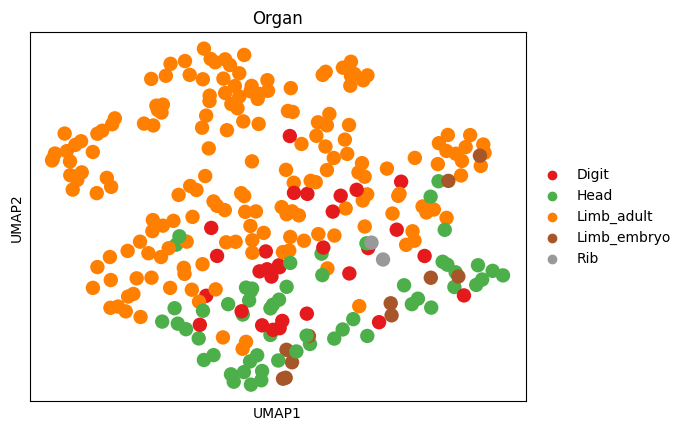

In [248]:
sc.pl.umap(trajMap2,color=["Organ"],save="Organ",palette="Set1")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


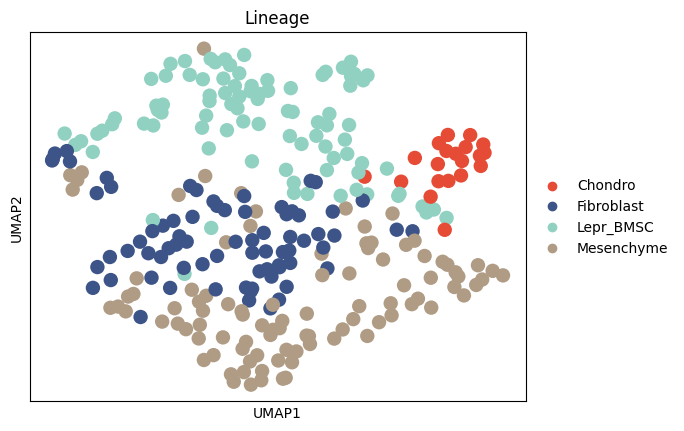

In [200]:
sc.pl.umap(trajMap2,color=["Lineage"],save="Lineage",palette="npg_nrc")

In [252]:
trajMap2.obs["Stage_short"]=trajMap2.obs["Stage"]

In [255]:
trajMap2.obs["Stage_short"]=trajMap2.obs["Stage_short"].astype("str")

In [256]:
trajMap2.obs["Stage_short"][trajMap2.obs["Stage"]=="Injury(5-FU)"]="Injury"
trajMap2.obs["Stage_short"][trajMap2.obs["Stage"]=="Injury(Radiation)"]="Injury"
trajMap2.obs["Stage_short"][trajMap2.obs["Stage"]=="Injury(Regeneration)"]="Injury"

/tmp/ipykernel_2250468/2881529471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajMap2.obs["Stage_short"][trajMap2.obs["Stage"]=="Injury(5-FU)"]="Injury"
/tmp/ipykernel_2250468/2881529471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajMap2.obs["Stage_short"][trajMap2.obs["Stage"]=="Injury(Radiation)"]="Injury"
/tmp/ipykernel_2250468/2881529471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajMap2.obs["Stage_shor

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


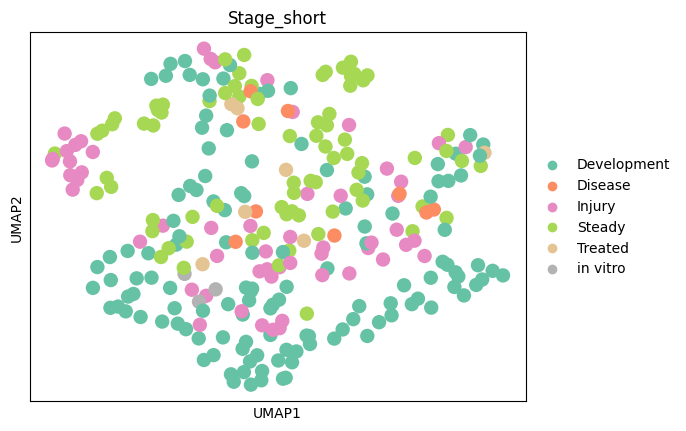

In [260]:
sc.pl.umap(trajMap2,color=["Stage_short"],save="Stage",palette="Set2")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


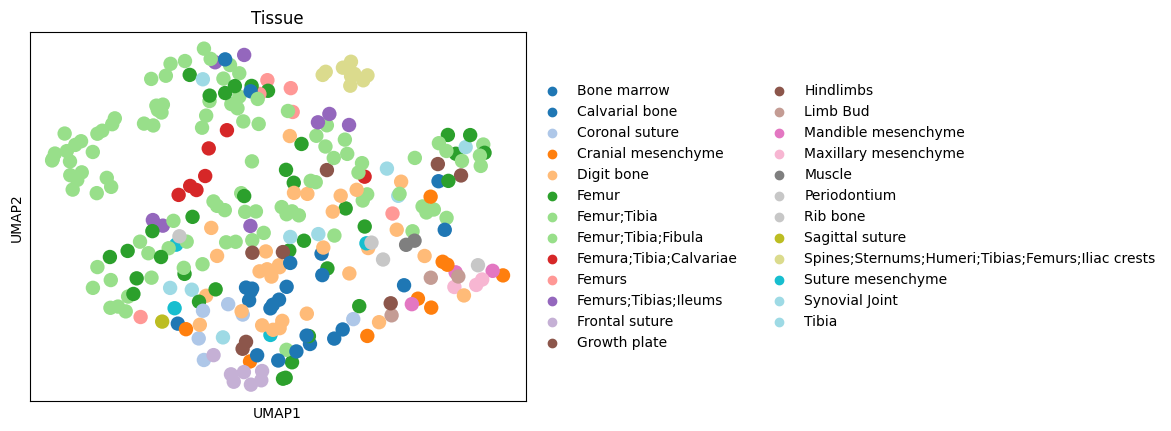

In [244]:
sc.pl.umap(trajMap2,color=["Tissue"],save="Tissue",palette="tab20")

In [232]:
import seaborn as sns
test=sns.color_palette("npg_nrc",60)

In [233]:
print(test.as_hex())

['#e64b35', '#e64b35', '#e64b35', '#e64b35', '#e64b35', '#e64b35', '#4dbbd5', '#4dbbd5', '#4dbbd5', '#4dbbd5', '#4dbbd5', '#4dbbd5', '#00a087', '#00a087', '#00a087', '#00a087', '#00a087', '#00a087', '#3c5488', '#3c5488', '#3c5488', '#3c5488', '#3c5488', '#3c5488', '#f39b7f', '#f39b7f', '#f39b7f', '#f39b7f', '#f39b7f', '#f39b7f', '#8491b4', '#8491b4', '#8491b4', '#8491b4', '#8491b4', '#8491b4', '#91d1c2', '#91d1c2', '#91d1c2', '#91d1c2', '#91d1c2', '#91d1c2', '#dc0000', '#dc0000', '#dc0000', '#dc0000', '#dc0000', '#dc0000', '#7e6148', '#7e6148', '#7e6148', '#7e6148', '#7e6148', '#7e6148', '#b09c85', '#b09c85', '#b09c85', '#b09c85', '#b09c85', '#b09c85']


In [202]:
trajMap2.obs['Age'] = pd.Categorical(trajMap2.obs['Age'], categories=['Organogenesis stage','Fetal stage',  'Postnatal', 'Young Adult',
                                                                    'Adult', 'Old'], ordered=True)


/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


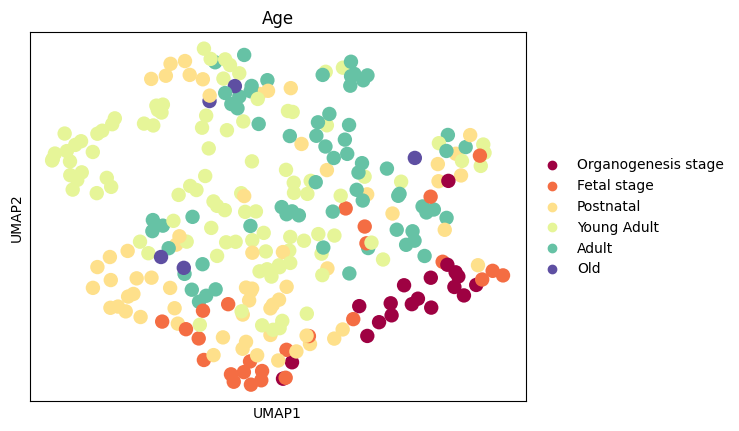

In [204]:
sc.pl.umap(trajMap2,color=["Age"],save="Age",palette="Spectral")

In [235]:
# generate 36 distinct colours (excluding black and white by default)
colors = distinctipy.get_colors(36)

cmaptest=distinctipy.get_colormap(colors)

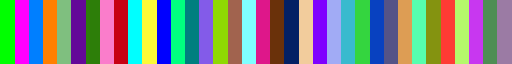

In [240]:
cmaptest.

In [246]:
import glasbey

# Add an extra 5 colours to matplotlib's tab10 palette
glasbey.extend_palette("tab10", palette_size=15)

ModuleNotFoundError: No module named 'glasbey'

In [263]:
trav=trajMap2["TRAV"]

In [267]:
trav.obsm=trajMap2.obsm
trav.obs=trajMap2.obs

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


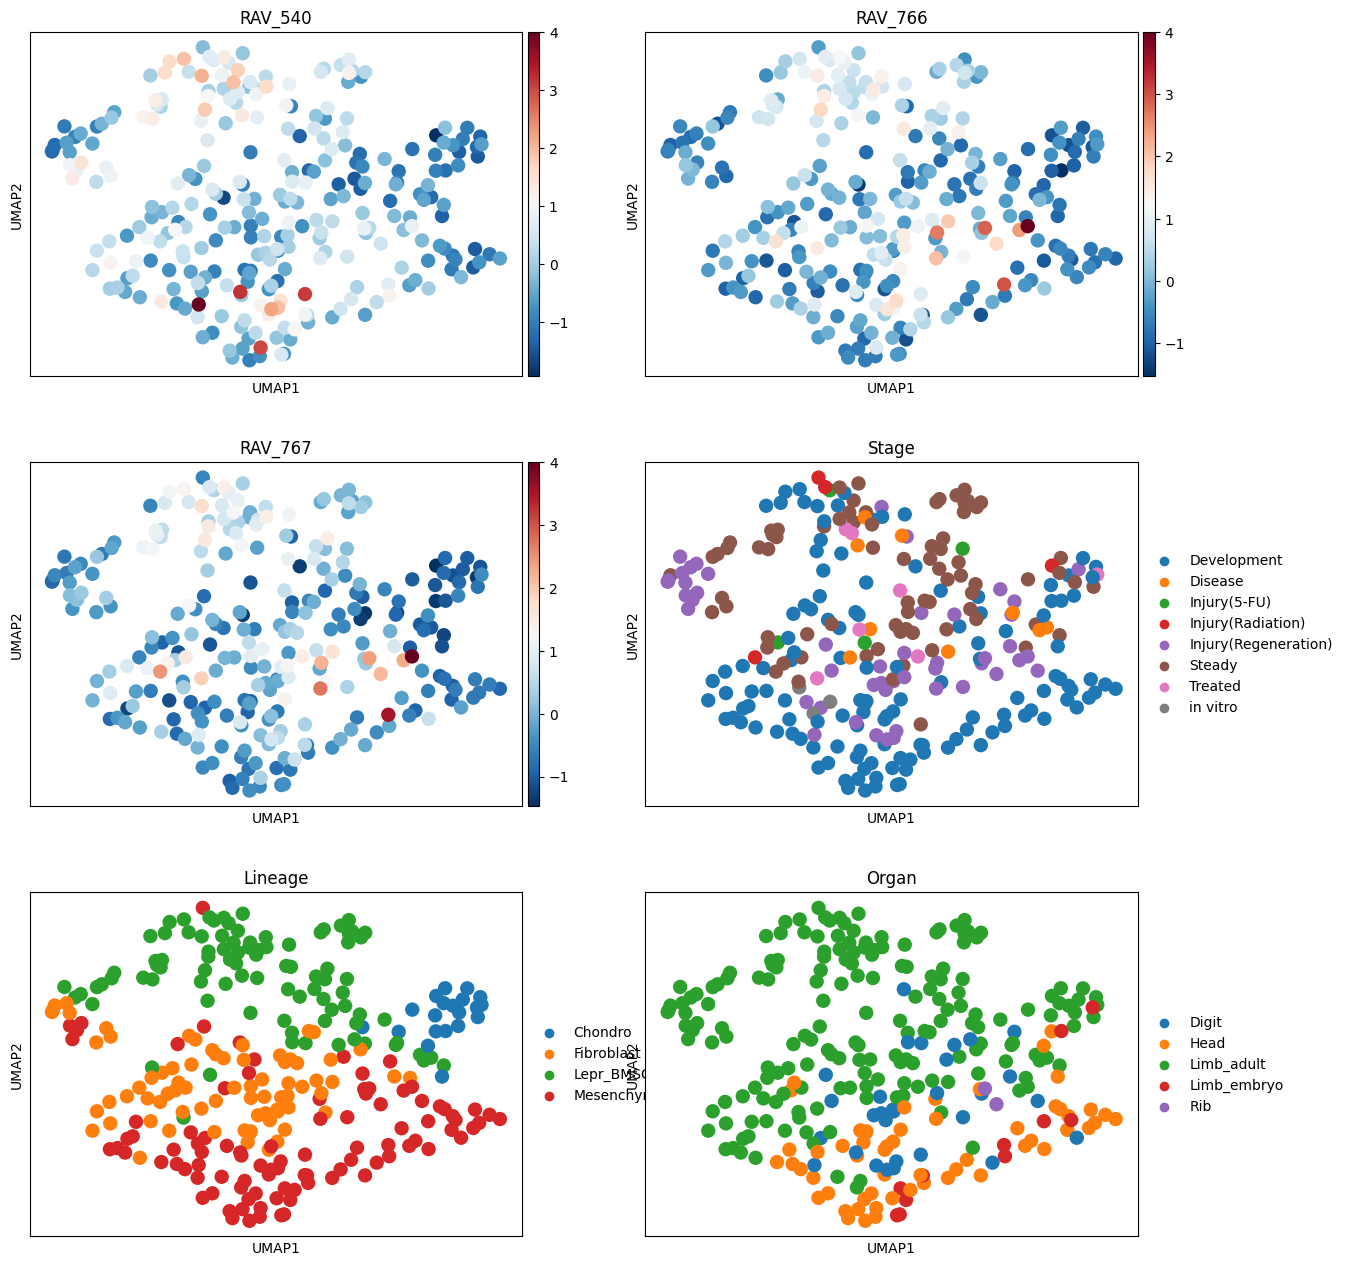

In [275]:
sc.pl.umap(trav,color=["RAV_540","RAV_766","RAV_767","Stage","Lineage","Organ"],ncols=2,cmap="RdBu_r",vmax=4)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWar

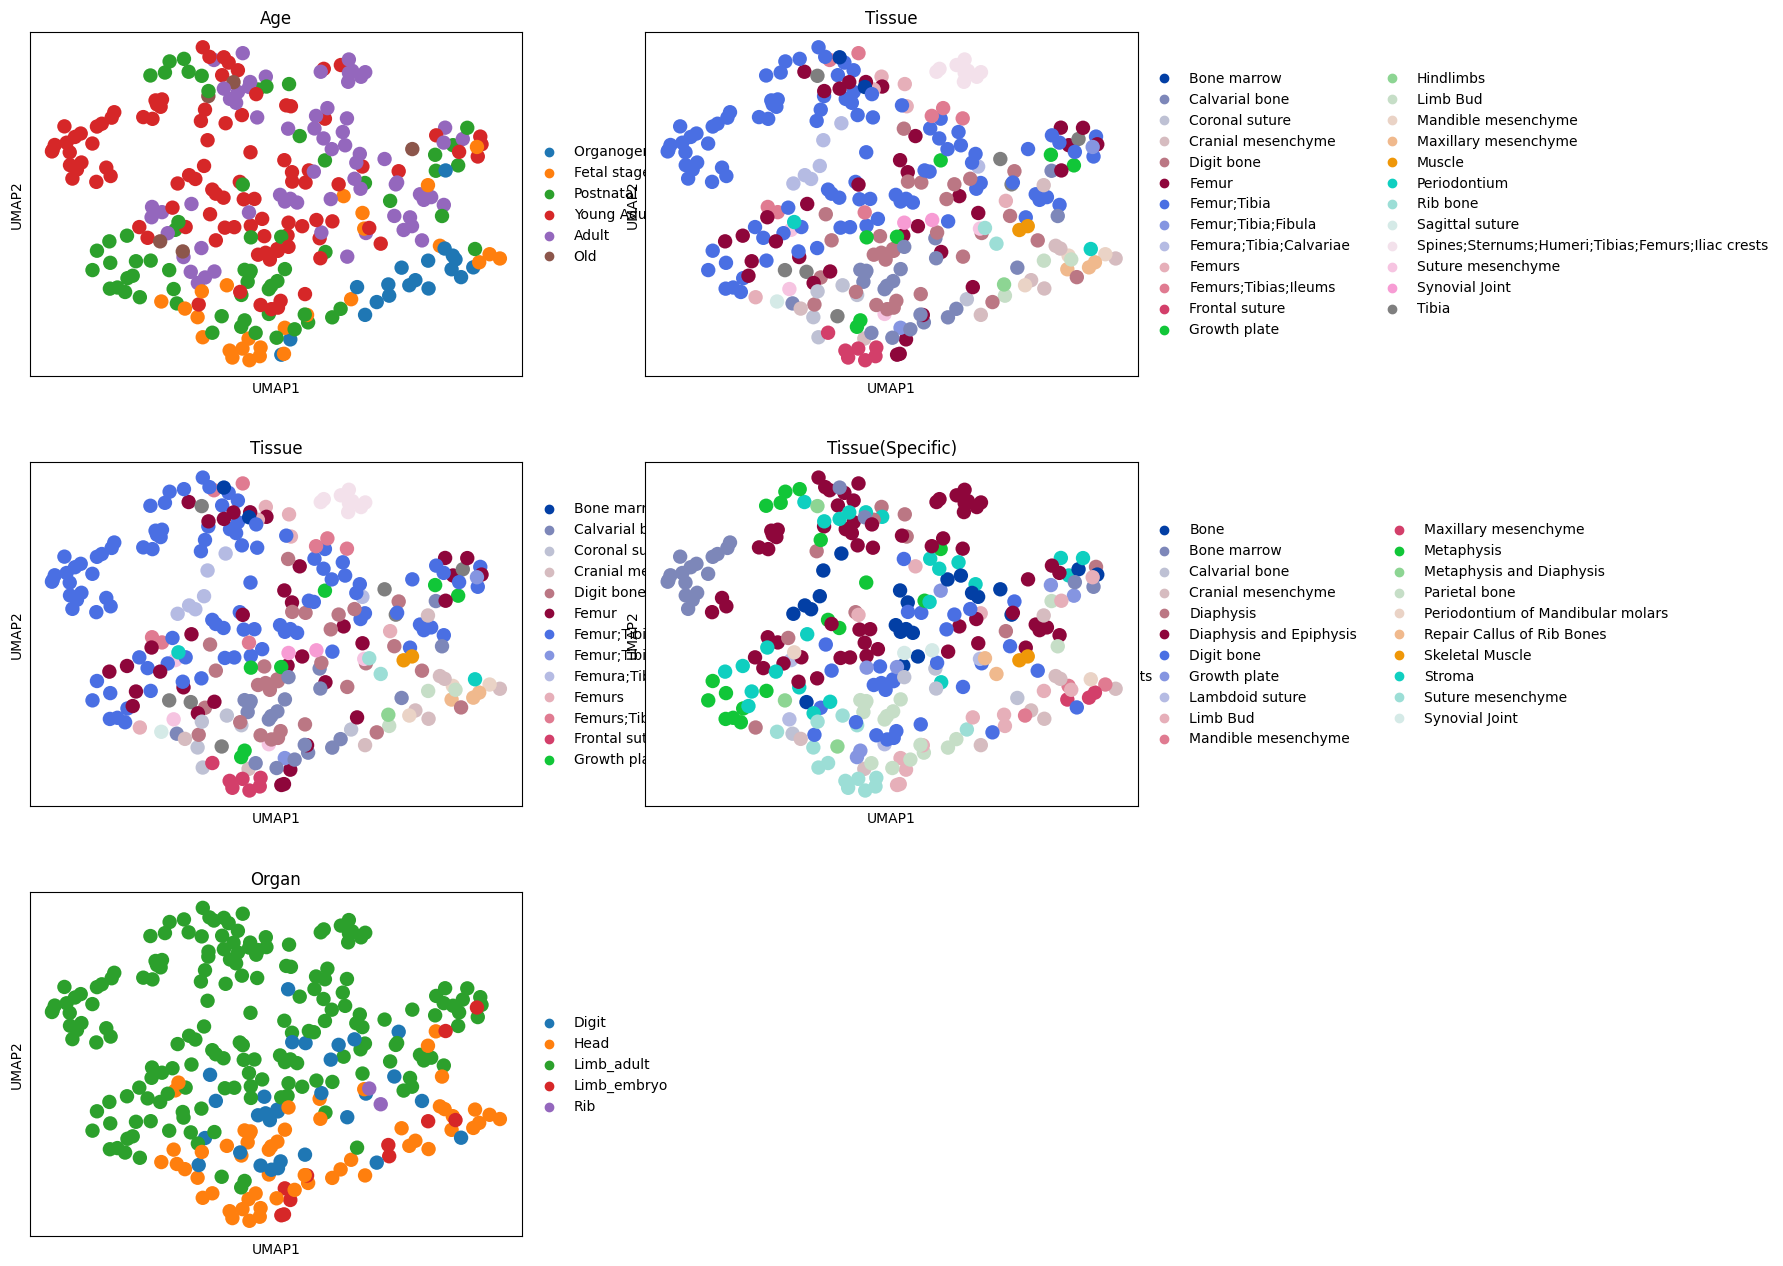

In [274]:
sc.pl.umap(trav,color=["Age","Tissue","Tissue","Tissue(Specific)","Organ"],ncols=2,cmap="RdBu_r",vmax=4)

In [91]:
trajMap

MuData object with n_obs × n_vars = 280 × 124529
  4 modalities
    coor:	280 x 41328
    expr:	280 x 41328
    peak:	280 x 41328
    TRAV:	280 x 545